### Anastasiia Leskiv Project 2 

# Business Understanding

A client reached who is thinking of buying a single family home and doesnt know which area is best. They wanted me to build them a regression to allow them to not overpay for a home and provide analysis on the types of homes they would find in each neighborhood. My objective was to observe properties of King County  for various home features and analyze the home prices based on those features. Then build a predictive regression model to predict the price of a home. After refining my model, I built dashboards to visualize and communicate my results. Which I will present to my client with my predictions.

# Data Understanding

Dataset contains thousands of data points. The data files provide all information about real estate market in King County which has 39 cities.In this project I used Data collecting, Data cleaning,Modeling, Exploratory data analysis, and Visualization to make the best prediction and recomendation to my client. I checked which neighborhoods are cheaper which are more expensive.How the footage of the home (sqft_living) affect the price? what features does efect the price and I did my prediction.

# Data Preparation

CSV for reading CSV file

Pandas and Numpy for data manipulation

Matplotlib and Seaborn for visualization

Statsmodel for statistical testing and modeling

SciPy Stats for obtaining probabilistic distributions

LinearRegression to predict the value of a variable based on the value of another variable.

Lasso Regration to remove unnecessary features

A training dataset for creating the linear regression model and a testing dataset was created by taking 80% of the data points for training and 20% for testing.


In [1]:
# import all necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [2]:
# reading the csv file
df = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
df.head() 

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [3]:
df= df[df["sqft_living"].notna()]

In [4]:
df= df[df["yr_built"].notna()]

In [5]:
df= df[df["price"].notna()]

In [6]:
# Checking list of all columns  
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'condition',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'address',
 'lat',
 'long']

Columns

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- greenbelt - natural, undeveloped, and/or agricultural lands that surround urban areas
- nuisance
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- heat_source 
- sewer_system - A sanitary sewer
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- sqft_garage - Square footage of the garage
- sqft_patio - Square footage of the patio
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- address
- lat - Lattitude
- long - Longitude

# Modeling

First I want to use info() - method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

In [7]:
#Checkin information about given DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Next step is to use describe() for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types

In [8]:
# generating descriptive statistics
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  3.015500e+04  3.015500e+04  30155.000000  30155.000000  30155.000000   
mean   4.538104e+09  1.108536e+06      3.413530      2.334737   2112.424739   
std    2.882587e+09  8.963857e+05      0.981612      0.889556    974.044318   
min    1.000055e+06  2.736000e+04      0.000000      0.000000      3.000000   
25%    2.064175e+09  6.480000e+05      3.000000      2.000000   1420.000000   
50%    3.874011e+09  8.600000e+05      3.000000      2.500000   1920.000000   
75%    7.287100e+09  1.300000e+06      4.000000      3.000000   2619.500000   
max    9.904000e+09  3.075000e+07     13.000000     10.500000  15360.000000   

           sqft_lot        floors    sqft_above  sqft_basement   sqft_garage  \
count  3.015500e+04  30155.000000  30155.000000   30155.000000  30155.000000   
mean   1.672360e+04      1.543492   1809.826098     476.039396    330.211142   
std    6.038260e+04      0.567717    878.306131     579.631302    285.770536   
min    4.020000e+02      1.000000      2.000000       0.000000      0.000000   
25%    4.850000e+03      1.000000   1180.000000       0.000000      0.000000   
50%    7.480000e+03      1.500000   1560.000000       0.000000    400.000000   
75%    1.057900e+04      2.000000   2270.000000     940.000000    510.000000   
max    3.253932e+06      4.000000  12660.000000    8020.000000   3580.000000   

         sqft_patio      yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  30155.000000  
mean     217.412038   1975.163953     90.922301     47.328076   -121.317397  
std      245.302792     32.067362    416.473038      1.434005      5.725475  
min        0.000000   1900.000000      0.000000     21.274240   -157.791480  
25%       40.000000   1953.000000      0.000000     47.405320   -122.326045  
50%      150.000000   1977.000000      0.000000     47.551380   -122.225585  
75%      320.000000   2003.000000      0.000000     47.669913   -122.116205  
max     4370.000000   2022.000000   2022.000000     64.824070    -70.074340

Now, I want to check if I have any missing values in giver data set

In [9]:
#Detecting missing values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Using "drop()" to drop unnecessary columns. The columns I don't plan to use in my future analysis 

In [10]:
df.drop(columns=[ 'id','date'], inplace=True)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  675000.0         4        1.0         1180      7140     1.0         NO   
1  920000.0         5        2.5         2770      6703     1.0         NO   
2  311000.0         6        2.0         2880      6156     1.0         NO   
3  775000.0         3        3.0         2160      1400     2.0         NO   
4  592500.0         2        2.0         1120       758     2.0         NO   

  greenbelt nuisance     view  ... sewer_system sqft_above sqft_basement  \
0        NO       NO     NONE  ...       PUBLIC       1180             0   
1        NO      YES  AVERAGE  ...       PUBLIC       1570          1570   
2        NO       NO  AVERAGE  ...       PUBLIC       1580          1580   
3        NO       NO  AVERAGE  ...       PUBLIC       1090          1070   
4        NO      YES     NONE  ...       PUBLIC       1120           550   

  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0           0          40      1969             0   
1           0         240      1950             0   
2           0           0      1956             0   
3         200         270      2010             0   
4         550          30      2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 23 columns]

I want to plot histograms across all columns for better understanding and visualization 

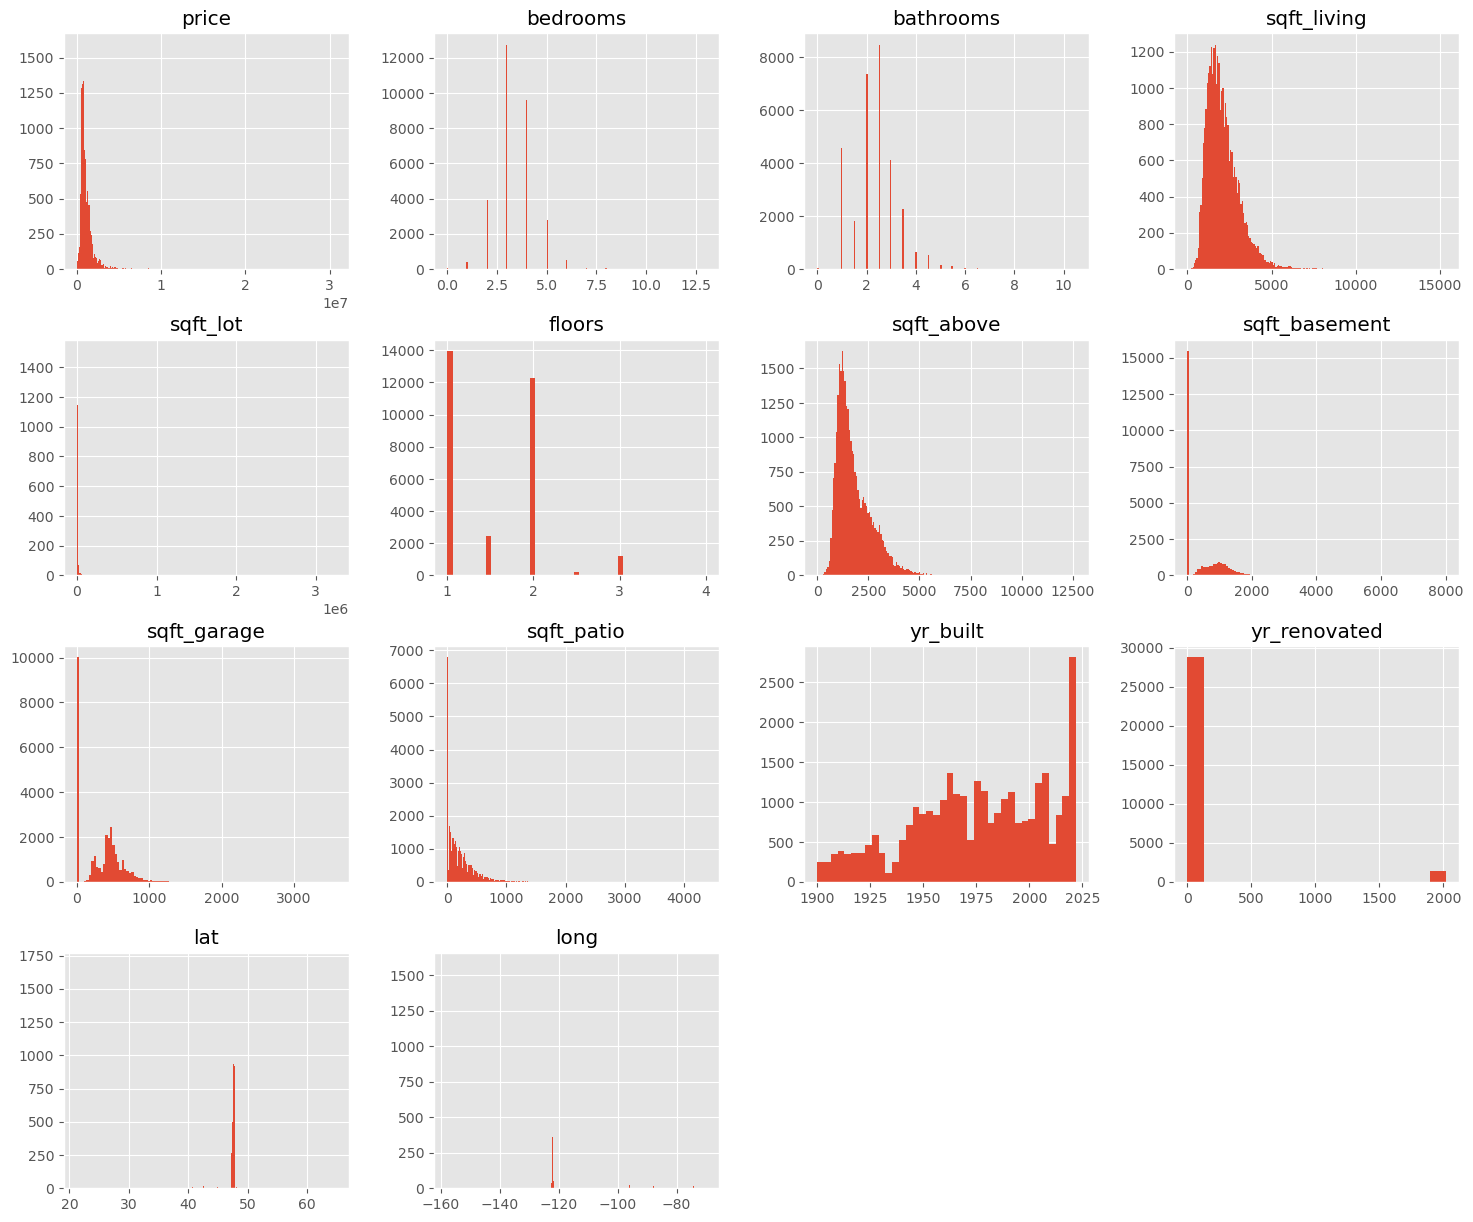

In [11]:
# histograms across all columns

df.hist(figsize=(18,15), bins='auto');

Compute the standard deviation along the specified axis. Returns the standard deviation, a measure of the spread of a distribution, of the array elements.

In [12]:
#chechinf mean of the price range
std = df.price.std()
print('std: ',std)
mean = df.price.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)

std:  896385.6591926547
mean:  1108535.837871
mean +1 std:  2004921.4970636545
mean -1 std:  212150.17867834528


 I want to find out what is the most expensive and cheapest neighborhoods. For that first I want to use Seaborn Pairplot this is a great data visualisation tool that helps us become familiar with our data. We can plot a large amount of data on a single figure and gain an understanding of it

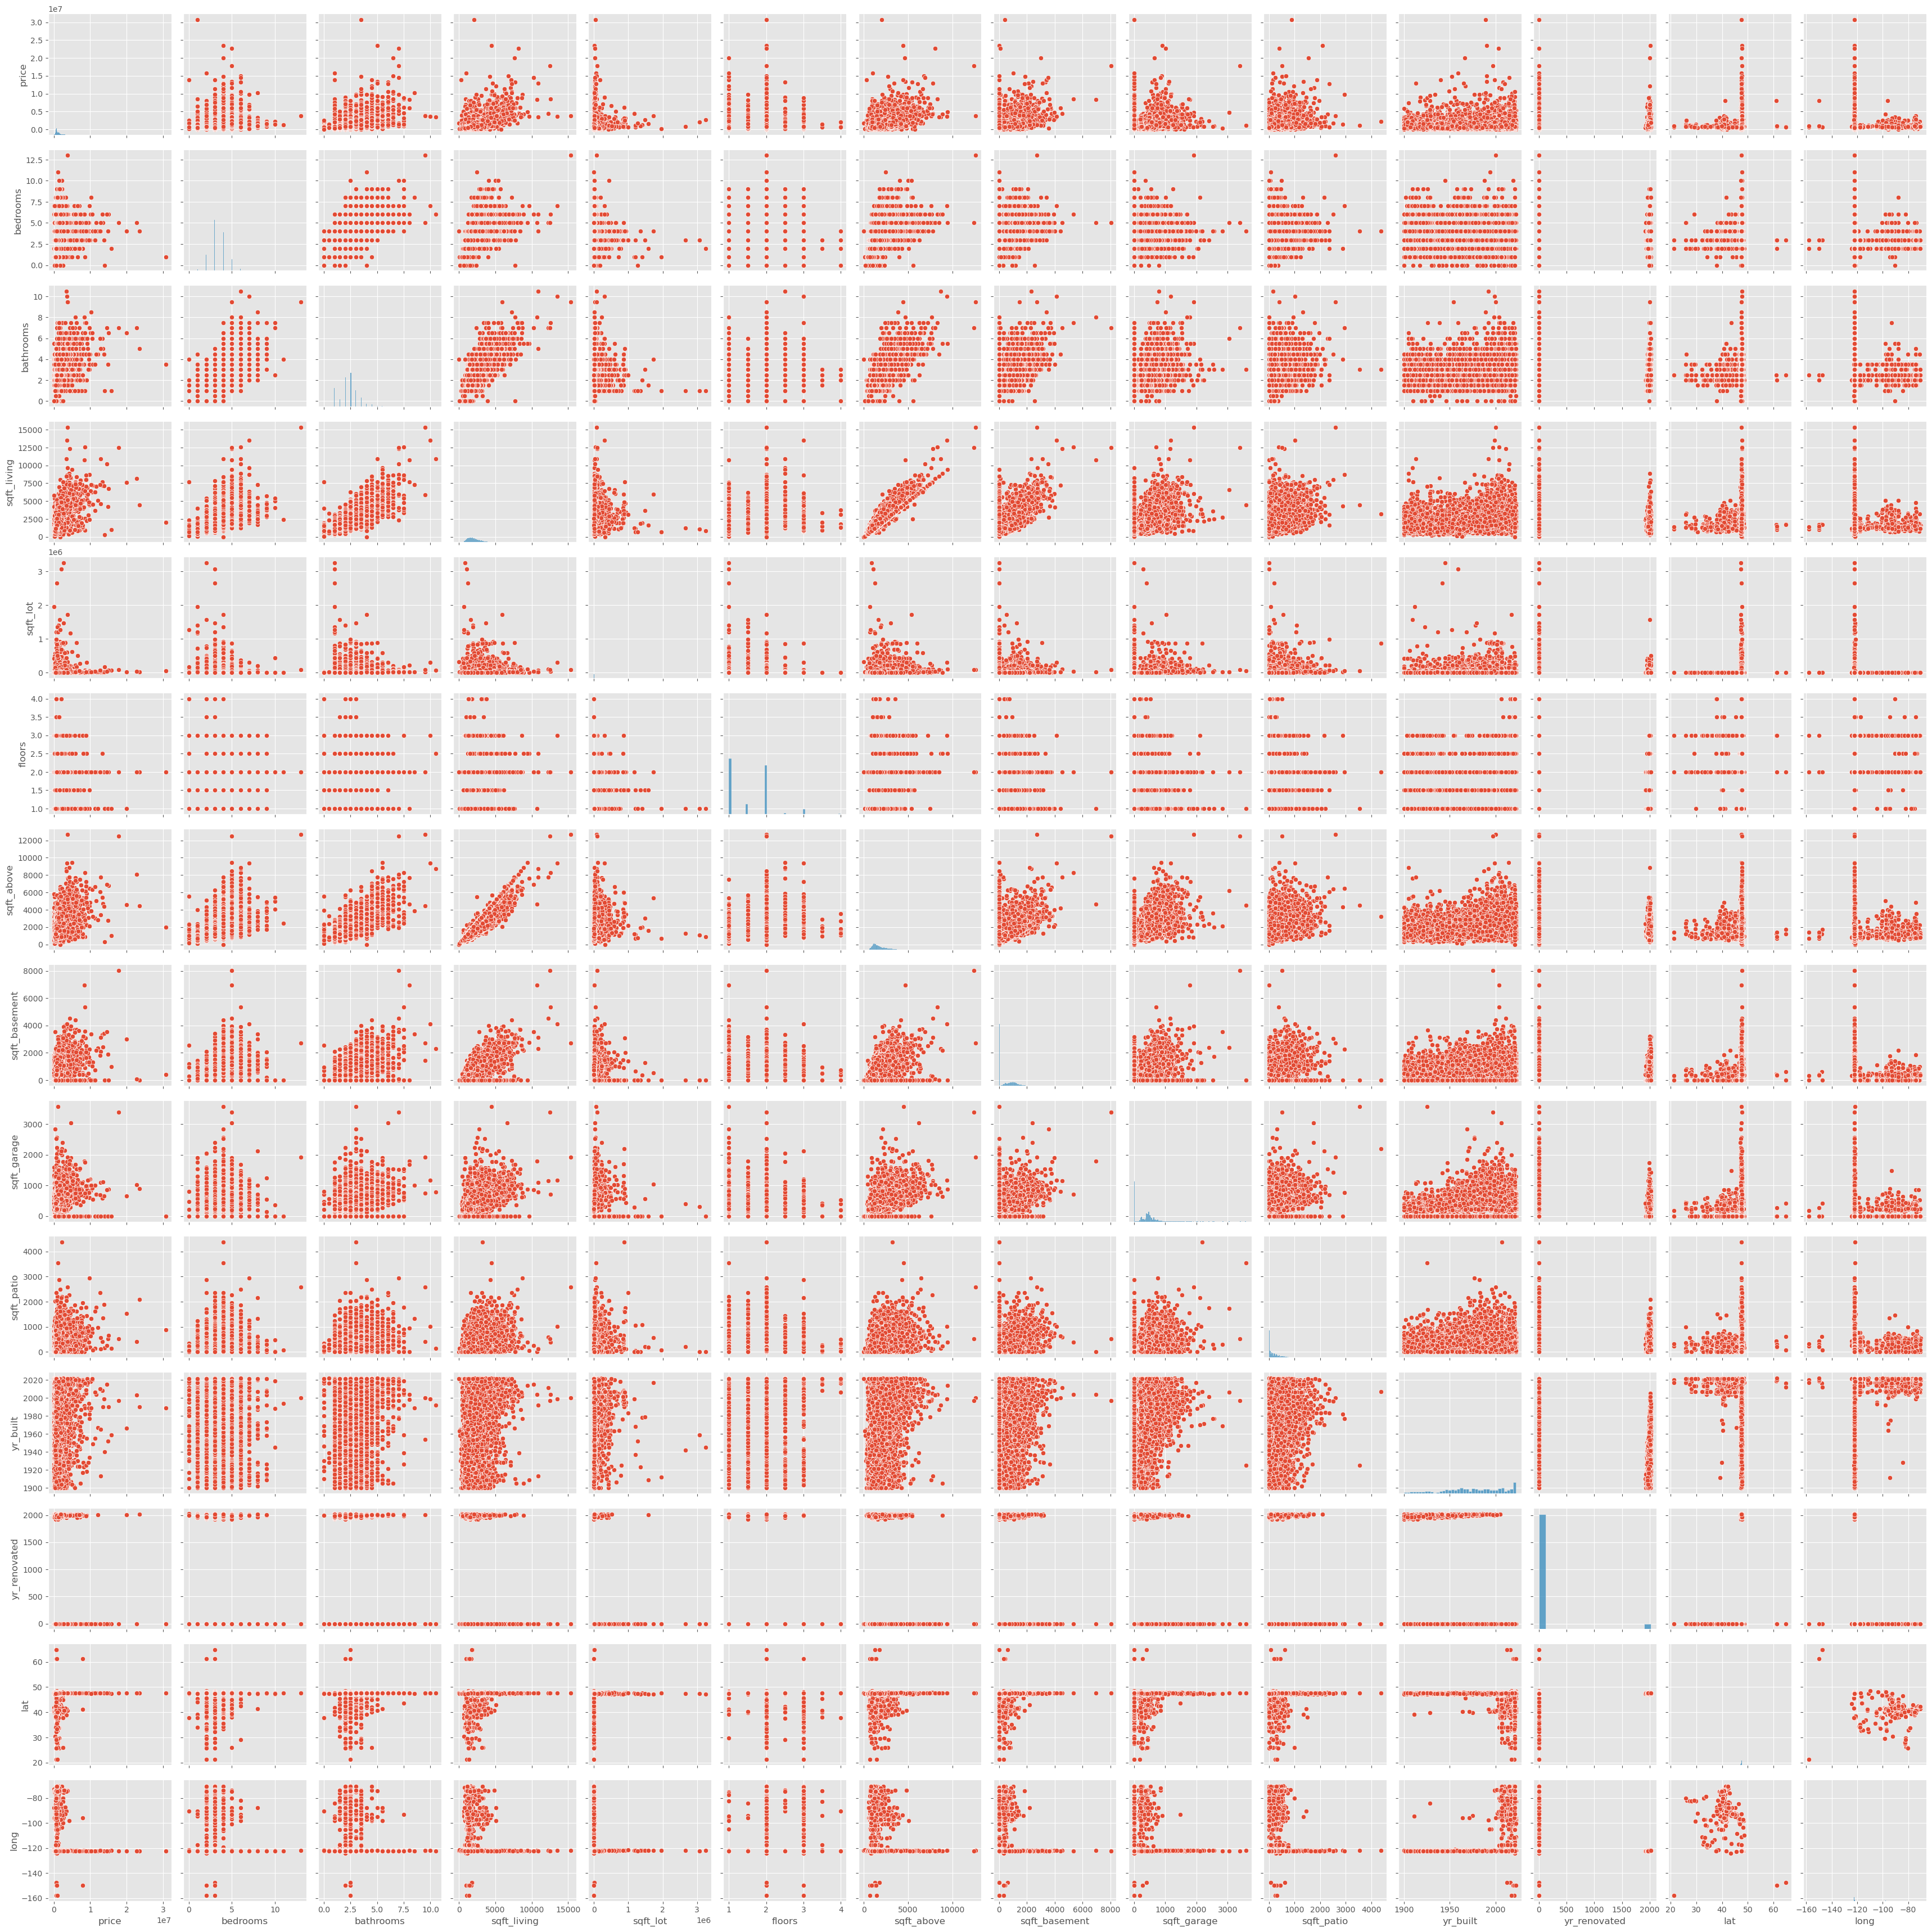

In [13]:
sns.pairplot(df)

Next step will be to use .loc to see what are the most expensive and cheap houses in our data set 

In [14]:
# I determined top of house prices. Looking at upscale homes of expensive neighborhoods 

expensive_houses = df.loc[df['price'] >= 10000000]
expensive_houses_list = list(expensive_houses['price'])
print(expensive_houses)

            price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3760   23500000.0         4        5.0         4440     15494     2.0   
5811   13950000.0         0        1.0          290    178017     1.0   
6106   13300000.0         6        6.0         7680      9750     2.5   
6936   12901148.0         4        5.0        10900     30417     2.0   
8054   14850000.0         4        3.5         4240     67106     1.0   
8656   13425000.0         5        5.0         7140     24443     2.0   
9374   10000000.0         3        4.5         4820     20286     2.0   
9516   15740000.0         2        1.0         1010     68824     1.0   
10605  15000001.0         6        6.5         6780     77594     2.0   
11464  11400000.0         3        3.5         3680     31848     1.0   
12712  12125000.0         4        4.5         5070     22277     1.0   
12817  13850000.0         3        4.5         7170     27107     2.0   
16673  12932174.0         5        5.0         4600

I found out what are upscale homes of the most expensive neighborhoods. Now I want to know what are the cheapest

In [15]:
cheap_houses = df.loc[df['price'] <= 60000 ]
cheap_houses_list = list(cheap_houses['price'])
print(cheap_houses)

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
56     37440.0         4        2.5         1670     13703     1.0         NO   
3676   50000.0         3        1.0         1850     17312     2.0         NO   
4300   52650.0         3        2.0         2050     15600     1.0         NO   
4487   47801.0         4        3.0         3440    215622     1.5         NO   
5617   50000.0         2        1.0         1320     67082     1.5        YES   
6430   40000.0         4        4.5         5780     52101     2.0         NO   
6509   51407.0         5        2.0         1760      9148     2.0         NO   
7577   28307.0         2        1.0         1660     56809     1.0         NO   
8557   27360.0         2        1.0          730      7200     1.0         NO   
8622   52593.0         2        1.0          860     19400     1.0         NO   
8693   55000.0         3        2.5         2130     13785     1.0         NO   
9125   29941.0         5    

Using corr() method to find the correlation of each column in a DataFrame.

In [16]:
#calculating the relationship between price and each column in our data set
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

I got the number 1.000000 in price, which makes sense, each column always has a perfect relationship with itself.
As I know I have to have at least 0.6 (or -0.6) to call it a good correlation.

0.9 to 1 positive or negative indicates a very strong correlation.

0.7 to 0.9 positive or negative indicates a strong correlation.

0.5 to 0.7 positive or negative indicates a moderate correlation.

0.3 to 0.5 positive or negative indicates a weak correlation.

0 to 0.3 positive or negative indicates a negligible correlation.

In [17]:
#pulling zipcodes from address
df['zipcode']= df['address'].str.extract(r"\b(\d{5})\b")

In [18]:
# taking cities from address
df2=df["address"].apply(lambda x: x.split(","))
df['city'] = df2.apply(lambda x: x[1].strip())

In [19]:
df_clean= df.drop(columns= ['nuisance','view','condition','grade','heat_source','floors','sqft_lot','waterfront','greenbelt','sewer_system','sqft_above',
                                   'sqft_basement','sqft_garage','sqft_patio','lat','long'])

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30155 non-null  float64
 1   bedrooms      30155 non-null  int64  
 2   bathrooms     30155 non-null  float64
 3   sqft_living   30155 non-null  int64  
 4   yr_built      30155 non-null  int64  
 5   yr_renovated  30155 non-null  int64  
 6   address       30155 non-null  object 
 7   zipcode       30155 non-null  object 
 8   city          30155 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.3+ MB


In [21]:
df_clean['zipcode']= df_clean['zipcode'].astype(int)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30155 non-null  float64
 1   bedrooms      30155 non-null  int64  
 2   bathrooms     30155 non-null  float64
 3   sqft_living   30155 non-null  int64  
 4   yr_built      30155 non-null  int64  
 5   yr_renovated  30155 non-null  int64  
 6   address       30155 non-null  object 
 7   zipcode       30155 non-null  int64  
 8   city          30155 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 3.3+ MB


Usind the sort_values() method to sorts the DataFrame by the specified label in my case I want to sort by price 

In [23]:
df_clean.sort_values("price", ascending=True).head(20)

price  bedrooms  bathrooms  sqft_living  yr_built  yr_renovated  \
8557   27360.0         2        1.0          730      1954             0   
21793  27563.0         3        2.5         2320      2008             0   
7577   28307.0         2        1.0         1660      1951             0   
20406  28559.0         3        2.5         1880      2001             0   
27028  28854.0         2        1.0          770      1924             0   
9125   29941.0         5        1.5         2560      1952             0   
25830  30108.0         5        3.5         4230      1900          1957   
26406  30500.0         3        1.0          840      1943             0   
20157  31190.0         3        2.5         1510      2007             0   
11009  31582.0         1        1.0         1300      1934             0   
14544  35000.0         2        2.0         1920      1918             0   
22992  36480.0         3        1.0         1460      1958             0   
56     37440.0         4        2.5         1670      1967             0   
18046  37996.0         2        1.0         1330      1925             0   
17641  38478.0         3        3.0         1360      1943          1989   
6430   40000.0         4        4.5         5780      2000             0   
14847  40026.0         3        2.0         1830      1944             0   
24695  40913.0         4        2.0         1790      1960             0   
20087  41181.0         3        2.0         1400      1980             0   
12688  45000.0         5        3.0         2450      1961             0   

                                                 address  zipcode         city  
8557   320 South 184th Street, Burien, Washington 981...    98148       Burien  
21793  1528 19th Avenue, Seattle, Washington 98122, U...    98122      Seattle  
7577   15708 124th Avenue Northeast, Woodinville, Was...    15708  Woodinville  
20406  417 Hoquiam Place Northeast, Renton, Washingto...    98059       Renton  
27028  3502 South 130th Street, Tukwila, Washington 9...    98168      Tukwila  
9125   15724 124th Avenue Northeast, Woodinville, Was...    15724  Woodinville  
25830  34920 Southeast Fall City-Snoqualmie Road, Fal...    34920    Fall City  
26406  7924 15th Avenue Southwest, Seattle, Washingto...    98106      Seattle  
20157  13726 Midvale Ave N, Seattle, Washington 98133...    13726      Seattle  
11009  4418 South 166th Street, SeaTac, Washington 98...    98188       SeaTac  
14544  412 35th Avenue South, Seattle, Washington 981...    98144      Seattle  
22992  3618 Northeast 10th Lane, Renton, Washington 9...    98056       Renton  
56     30326 110th Place Southeast, Auburn, Washingto...    30326       Auburn  
18046  1220 Northeast 95th Street, Seattle, Washingto...    98115      Seattle  
17641  16268 16th Avenue Southwest, Burien, Washingto...    16268       Burien  
6430   2030 250th Place Northeast, Sammamish, Washing...    98074    Sammamish  
14847  3519 South 137th Street, Tukwila, Washington 9...    98168      Tukwila  
24695  22741 10th Avenue South, Des Moines, Washingto...    22741   Des Moines  
20087  22625 120th Avenue Southeast, Kent, Washington...    22625         Kent  
12688  6109 Northeast 190th Street, Kenmore, Washingt...    98028      Kenmore

In [24]:
#houses with price less then $1200000
df_clean = df_clean[df_clean['price']< 1200000]

In [25]:
#houses with price more then $200000
df_clean = df_clean[df_clean['price']> 200000]

In [26]:
#houses with squere feet less then 5100
df_clean = df_clean[df_clean['sqft_living']< 5100]

In [27]:
df_clean.sort_values("sqft_living", ascending=False).head(20)

price  bedrooms  bathrooms  sqft_living  yr_built  yr_renovated  \
15292  1045000.0         5        5.5         4990      1990             0   
26544  1062500.0         6        5.5         4940      2017             0   
21186  1070000.0         6        5.5         4940      2018             0   
6537    995000.0         4        4.5         4870      2006             0   
24365   899999.0         5        3.5         4810      1950          2007   
3518    314039.0         5        4.5         4790      2017             0   
28993   920000.0         5        4.5         4720      2022             0   
17695   875000.0         5        4.5         4700      2022             0   
11862  1150000.0         4        4.5         4662      2008             0   
24996   875000.0         4        4.5         4620      1988          2021   
13805   725000.0         4        3.5         4610      1985             0   
17080  1150000.0         5        3.0         4580      1992             0   
25281   880000.0         3        2.0         4530      1973             0   
27852  1185000.0         4        2.5         4520      2007             0   
2198    993500.0         5        4.5         4510      2022             0   
17327   950000.0         4        4.0         4510      1952             0   
1980   1150000.0         4        3.0         4500      1925             0   
27183   872000.0         4        2.5         4500      1977             0   
29794   977000.0         8        4.5         4483      1998             0   
23234  1010000.0         4        3.5         4480      2009             0   

                                                 address  zipcode  \
15292  20503 96th Way S, Kent, Washington 98031, Unit...    20503   
26544  25807 205th Place Southeast, Covington, Washin...    25807   
21186  20815 Southeast 259th Court, Covington, Washin...    20815   
6537   5117 Highland Drive Southeast, Auburn, Washing...    98092   
24365  34130 35th Avenue Southwest, Federal Way, Wash...    34130   
3518   5202 South 170th Lane, SeaTac, Washington 9818...    98188   
28993  15030 Southeast 45th Place, Bellevue, Washingt...    15030   
17695  12845 Northeast 108th Place, Kirkland, Washing...    12845   
11862  26916 9th Avenue South, Des Moines, Washington...    26916   
24996  4324 South 284th Street, Auburn, Washington 98...    98001   
13805  27631 188th Place Southeast, Kent, Washington ...    27631   
17080  5607 South 288th Street, Auburn, Washington 98...    98001   
25281  38918 191st Avenue Southeast, Auburn, Washingt...    38918   
27852  11827 Southeast 227th Place, Kent, Washington ...    11827   
2198   12119 Northeast 64th Street, Kirkland, Washing...    12119   
17327  616 East Guiberson Street, Kent, Washington 98...    98030   
1980   35502 Southeast Fall City-Snoqualmie Road, Fal...    35502   
27183  25322 Southeast 380th Street, Enumclaw, Washin...    25322   
29794  21823 95th Place South, Kent, Washington 98031...    21823   
23234  26543 Southeast 354th Place, Black Diamond, Wa...    26543   

                city  
15292           Kent  
26544      Covington  
21186      Covington  
6537          Auburn  
24365    Federal Way  
3518          SeaTac  
28993       Bellevue  
17695       Kirkland  
11862     Des Moines  
24996         Auburn  
13805           Kent  
17080         Auburn  
25281         Auburn  
27852           Kent  
2198        Kirkland  
17327           Kent  
1980       Fall City  
27183       Enumclaw  
29794           Kent  
23234  Black Diamond

Corelation between prise and some features

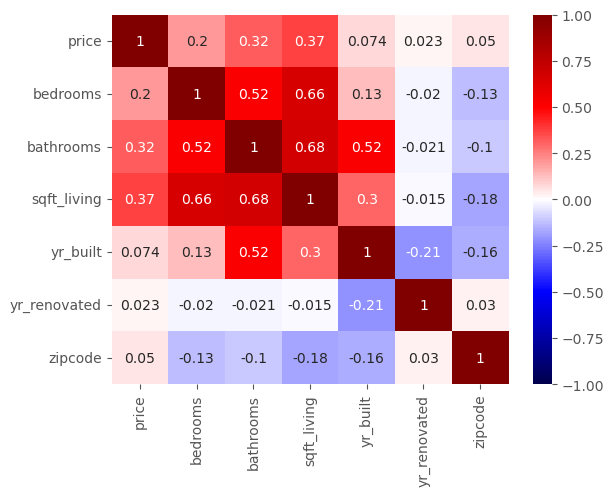

In [28]:
sns.heatmap(df_clean.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

During the exploratory analysis I can see good correlation between square footage and price.

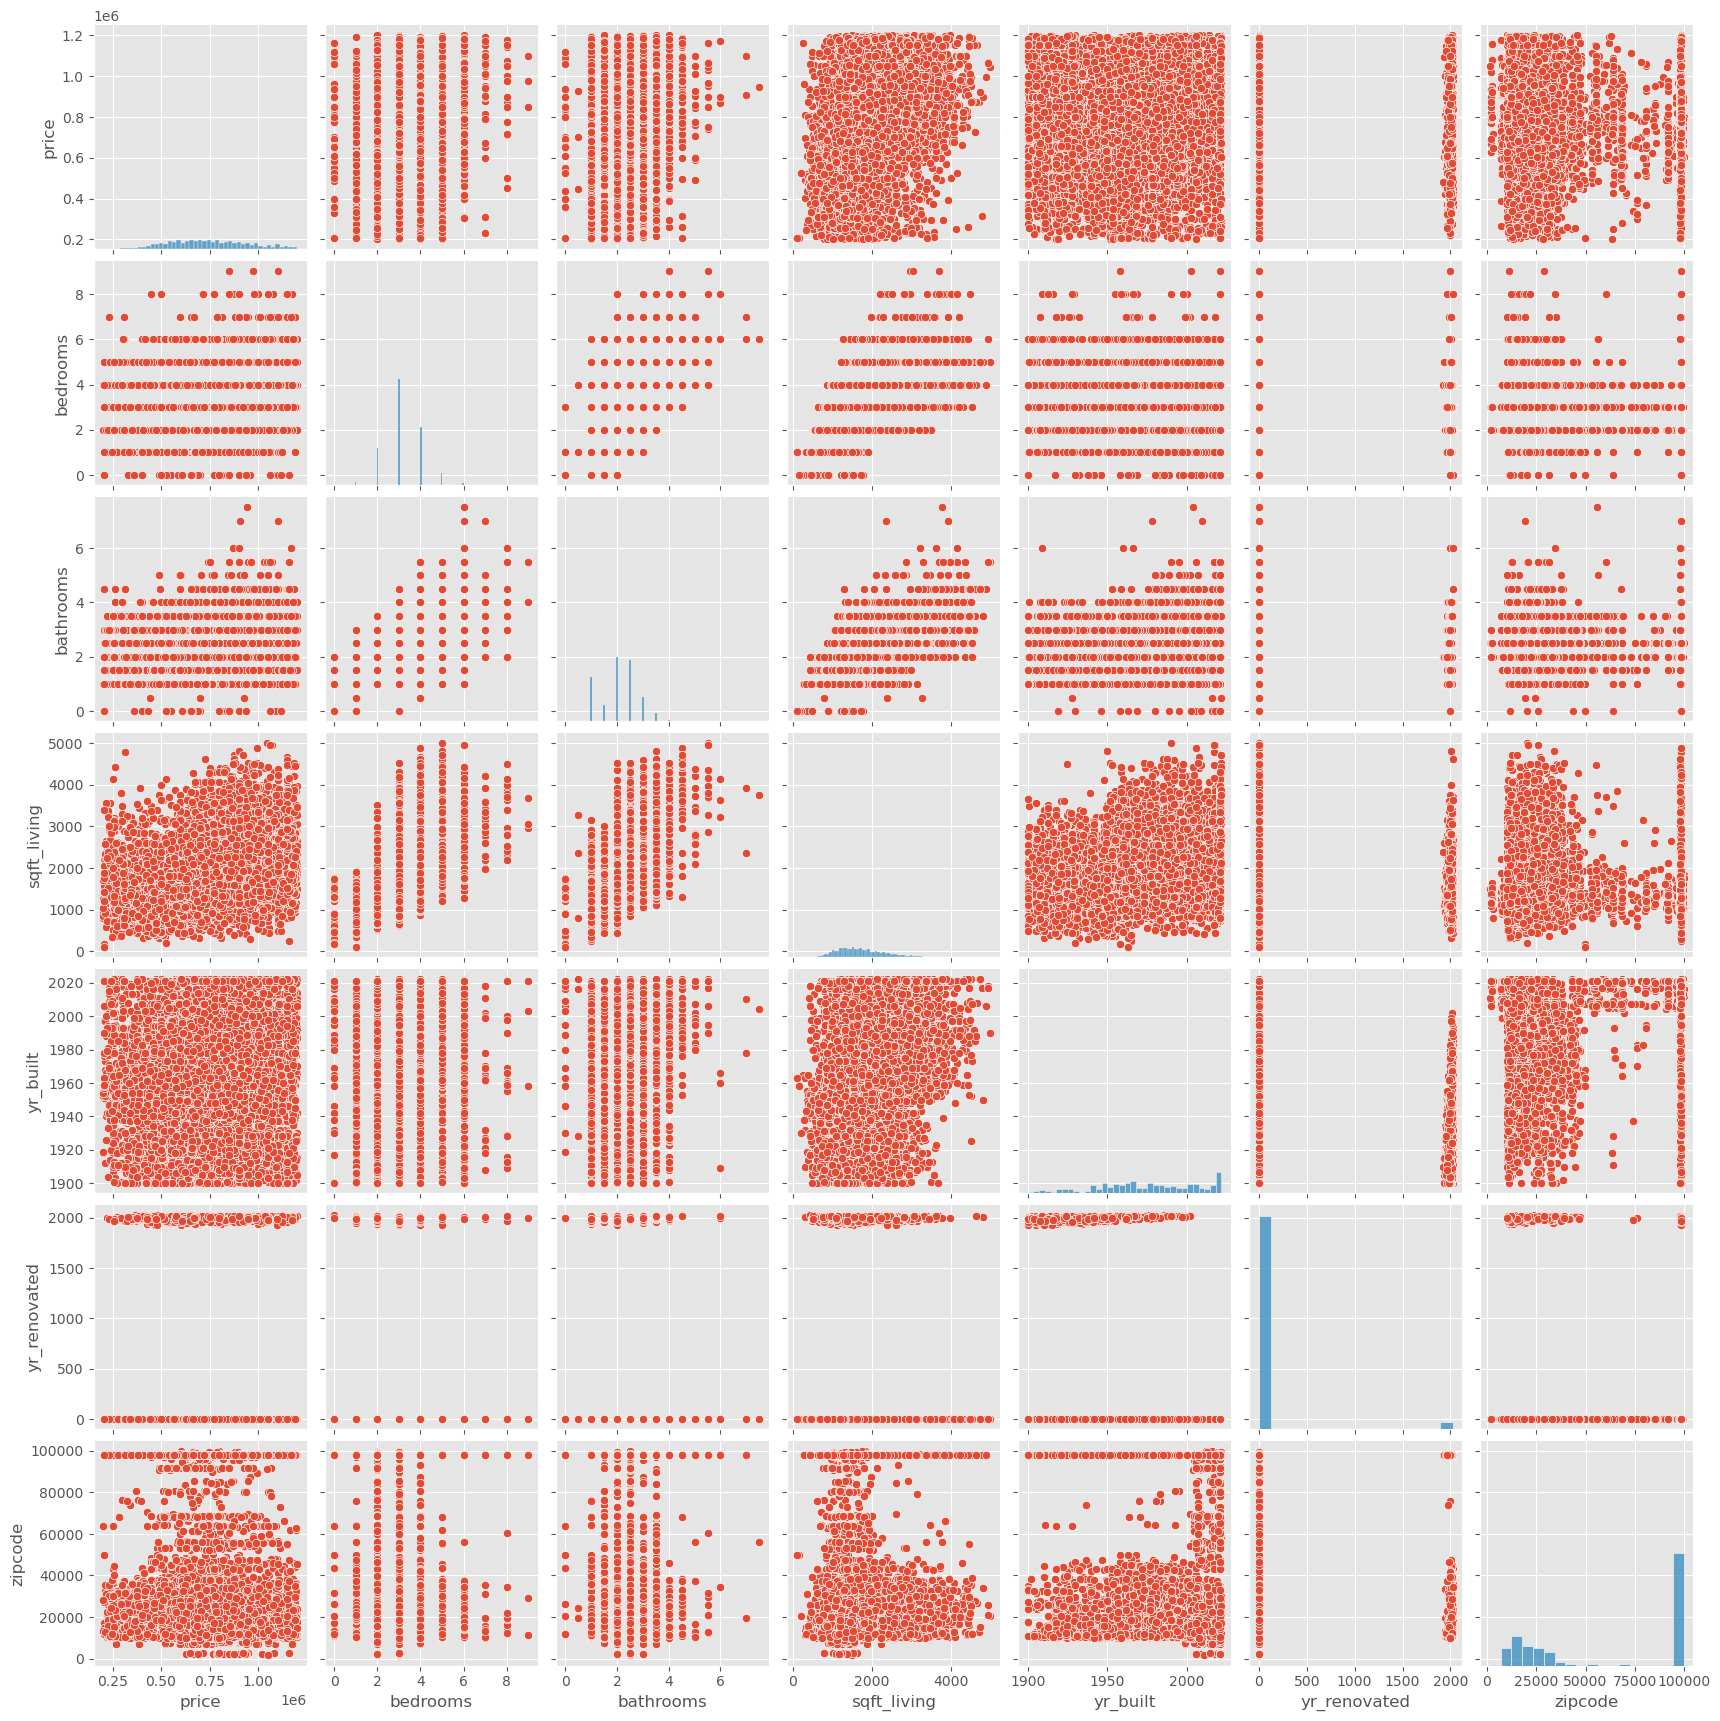

In [29]:
sns.pairplot(df_clean);

Next I want to find the relationship between price and Square Feet Living and make the regression model

In [30]:
# taking only columns that I will use for my regression model
correlation = ['price', 'sqft_living']
size = df[correlation]

In [31]:
size.corr()

price  sqft_living
price        1.000000     0.608521
sqft_living  0.608521     1.000000

Again we can see that sqft_living has correlation 0.608521 which is good correlation. Now I want to plot the graph for better visualization 

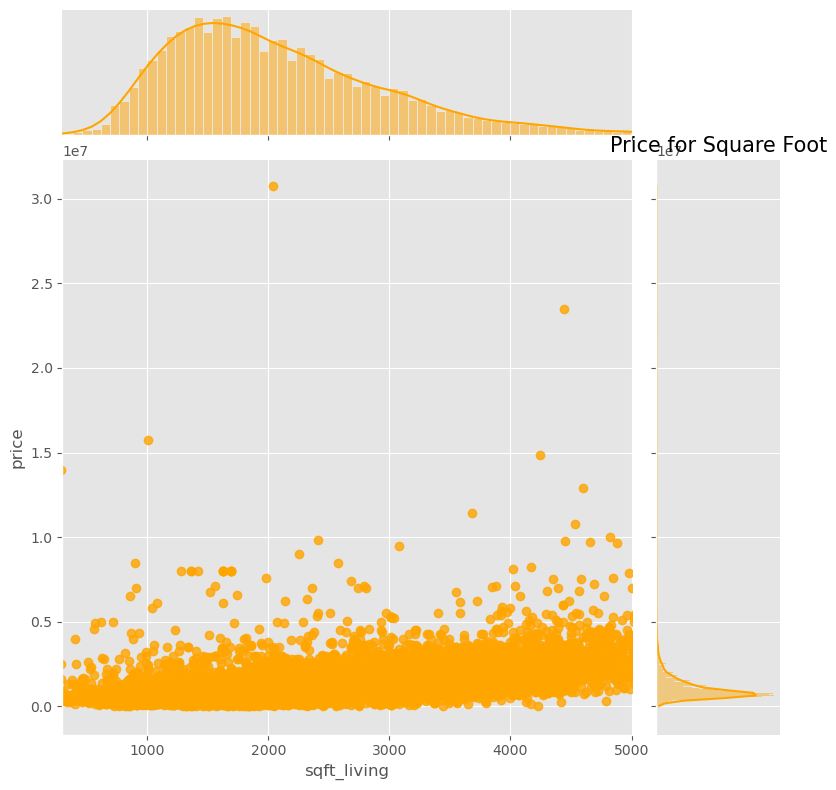

In [32]:
sns.jointplot(x = 'sqft_living', y = 'price' , data = df, kind = 'reg', height = 8, xlim = (300, 5000), 
              color = 'orange', ratio = 4)
plt.title('Price for Square Foot', fontsize = 15)
plt.ylabel('Price for sale', fontsize = 14)
plt.xlabel('Square Foot Living', fontsize = 14)
plt.show()

The histogram on the top shows the distribution of the variable at the x-axis and the histogram to the right shows the distribution of the variable at the y-axis. And the scatter plot is the usual x=a Vs y=b.

I want to calculate the slope to see what is the linear relationship

In [33]:
# calculating slope
def slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
        ((np.mean(xs)**2) - np.mean(xs*xs)))
    return m
slope(df['sqft_living'], df['price'])

560.0050219280564

As we can see the number is positive. If the slope of the line is positive, then there is a positive linear relationship. 560.0050219280564 is the number represents the estimated change in price for every sqft.

In [35]:
#calculating best fit line 
def best_fit_line(xs,ys):
    m = slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)    
    return m, c
m, c = best_fit_line(df['sqft_living'], df['price'])
m, c

(560.0050219280564, -74432.62432965916)

I calculated best fit line for my future plot.
The line of best fit is a line that goes roughly through the middle of all the scatter points on a graph.
The closer the points are to the line of best fit the stronger the correlation is.

In [36]:
def r_line (m, c, xs):
    return [(m*x) + c for x in xs]
regression_line = r_line(m,c,df['sqft_living'])

I calculated regration line for my future plot. A regression line is a statistical tool that depicts the correlation between two variables

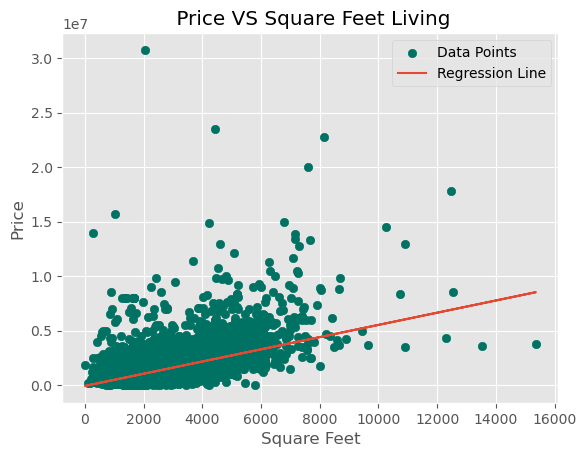

In [37]:
plt.scatter(df['sqft_living'], df['price'], color='#007263', label='Data Points')
plt.plot(df['sqft_living'], regression_line, label='Regression Line')
plt.legend()
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title(' Price VS Square Feet Living')
plt.show()

Here we can see  a positive correlation. A positive correlation shows that changes in one variable will relate to the same type of changes in a second variable.

In [38]:
# to build a model first I need to build a function
def build_model(df, outcome):
    predictors = ' + '.join(df.drop(columns=[outcome]).columns)
    formula = outcome + ' ~ ' + predictors
    model = ols(formula=formula, data=df).fit()
    return model

In [39]:
# building a model to look at the summary
build_model(df[['price', 'sqft_living']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:28:59   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As wwe can see here a Square Foot Living would cost $560.00
Square Feet Living and price have weak relationship becouse correlation between is 0.370(correlation under 0.4 considered weak relationship)

In [40]:
# building a model to look at the summary
build_model(df[['price', 'grade']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1742.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:29:02   Log-Likelihood:            -4.4815e+05
No. Observations:               30155   AIC:                         8.963e+05
Df Residuals:                   30142   BIC:                         8.964e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.352e+06   4.87e+05      2.776      0.006    3.98e+05    2.31e+06
grade[T.10 Very Good]   9.895e+05   4.88e+05      2.030      0.042     3.4e+04    1.95e+06
grade[T.11 Excellent]    2.19e+06   4.88e+05      4.484      0.000    1.23e+06    3.15e+06
grade[T.12 Luxury]      3.736e+06   4.91e+05      7.606      0.000    2.77e+06     4.7e+06
grade[T.13 Mansion]     6.047e+06   5.07e+05     11.925      0.000    5.05e+06    7.04e+06
grade[T.2 Substandard]  -1.05e+06   6.89e+05     -1.524      0.127    -2.4e+06       3e+05
grade[T.3 Poor]         -8.88e+05   5.23e+05     -1.697      0.090   -1.91e+06    1.38e+05
grade[T.4 Low]         -7.137e+05   4.97e+05     -1.437      0.151   -1.69e+06     2.6e+05
grade[T.5 Fair]        -7.339e+05   4.88e+05     -1.503      0.133   -1.69e+06    2.23e+05
grade[T.6 Low Average] -6.985e+05   4.87e+05     -1.433      0.152   -1.65e+06    2.57e+05
grade[T.7 Average]     -5.324e+05   4.87e+05     -1.093      0.275   -1.49e+06    4.23e+05
grade[T.8 Good]         -2.69e+05   4.87e+05     -0.552      0.581   -1.22e+06    6.86e+05
grade[T.9 Better]       2.338e+05   4.87e+05      0.480      0.631   -7.21e+05    1.19e+06
==============================================================================
Omnibus:                    40476.896   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32436451.405
Skew:                           7.185   Prob(JB):                         0.00
Kurtosis:                     163.029   Cond. No.                         505.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation betweem grade and price is considered a weak-moderate relationship becouse R-squared is only 0.4

Now I want to check how waterfront ( a part of a town that is next to an area of water such as a river or the ocean) efect the price of the house. 

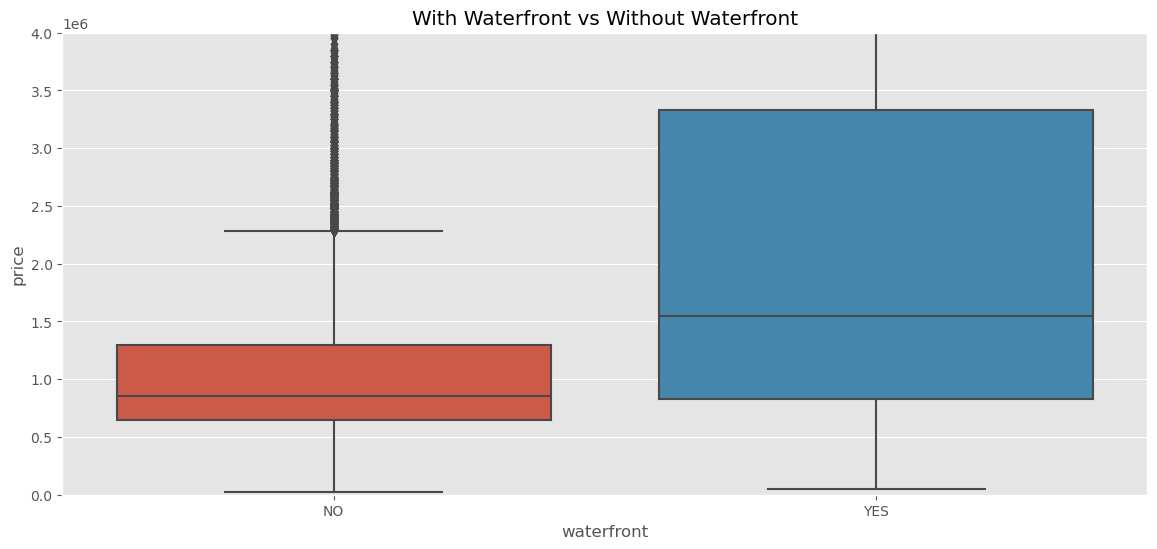

In [41]:
# Plotting plot for better vizualization of how presence of waterfront affect the price 
var = 'waterfront'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('With Waterfront vs Without Waterfront')
fig.axis(ymin=0, ymax=4000000);


With this plot I can see that presence waterfront not much but affect the price 

In [42]:
build_model(df[['price', 'waterfront']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1719.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:29:06   Log-Likelihood:            -4.5526e+05
No. Observations:               30155   AIC:                         9.105e+05
Df Residuals:                   30153   BIC:                         9.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.081e+06   5064.675    213.436      0.000    1.07e+06    1.09e+06
waterfront[T.YES]  1.601e+06   3.86e+04     41.463      0.000    1.53e+06    1.68e+06
==============================================================================
Omnibus:                    35538.027   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10944460.954
Skew:                           5.884   Prob(JB):                         0.00
Kurtosis:                      95.585   Cond. No.                         7.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

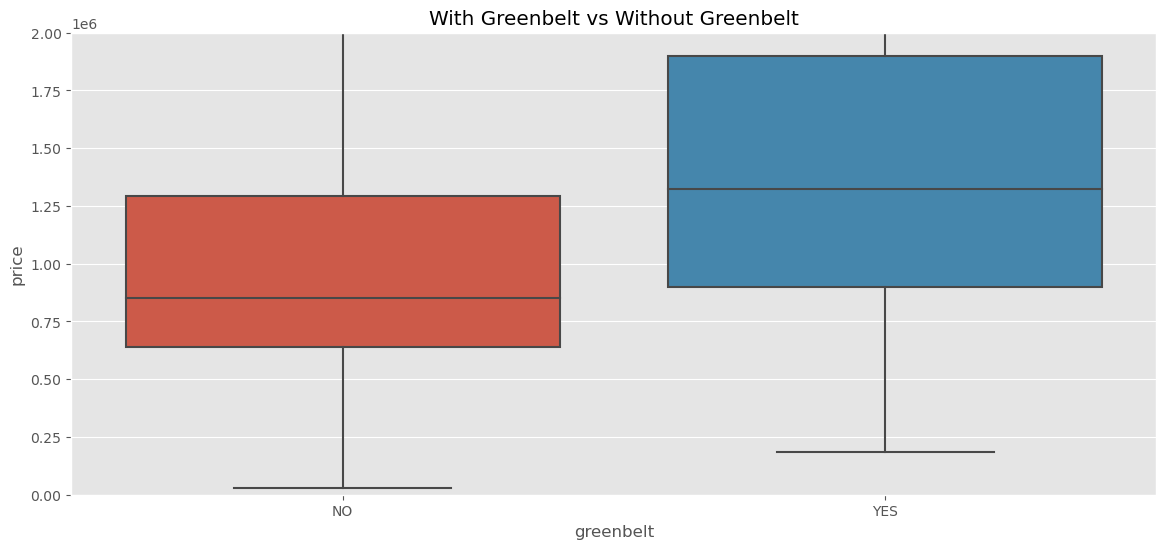

In [43]:
var = 'greenbelt'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('With Greenbelt vs Without Greenbelt')
fig.axis(ymin=0, ymax=2000000);

Greenbelt affect the price a little bit less, but still we can see that price slikely elevated

In [44]:
build_model(df[['price', 'greenbelt']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.77e-32
Time:                        17:29:10   Log-Likelihood:            -4.5603e+05
No. Observations:               30155   AIC:                         9.121e+05
Df Residuals:                   30153   BIC:                         9.121e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.099e+06   5217.319    210.570      0.000    1.09e+06    1.11e+06
greenbelt[T.YES]  3.871e+05   3.26e+04     11.880      0.000    3.23e+05    4.51e+05
==============================================================================
Omnibus:                    38131.263   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14716007.254
Skew:                           6.655   Prob(JB):                         0.00
Kurtosis:                     110.402   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

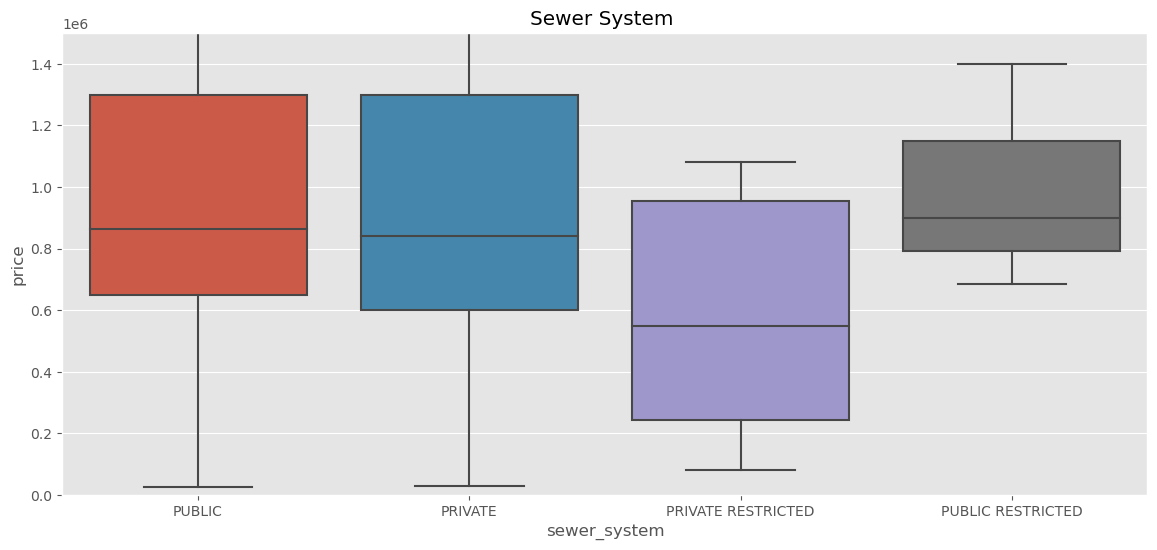

In [45]:
#Checking how sewer system affect the price
var = 'sewer_system'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Sewer System ')
fig.axis(ymin=0, ymax=1500000);

Sewer System does not effect price a lot slighly cheeper price we have for houses with private restricted sewer system

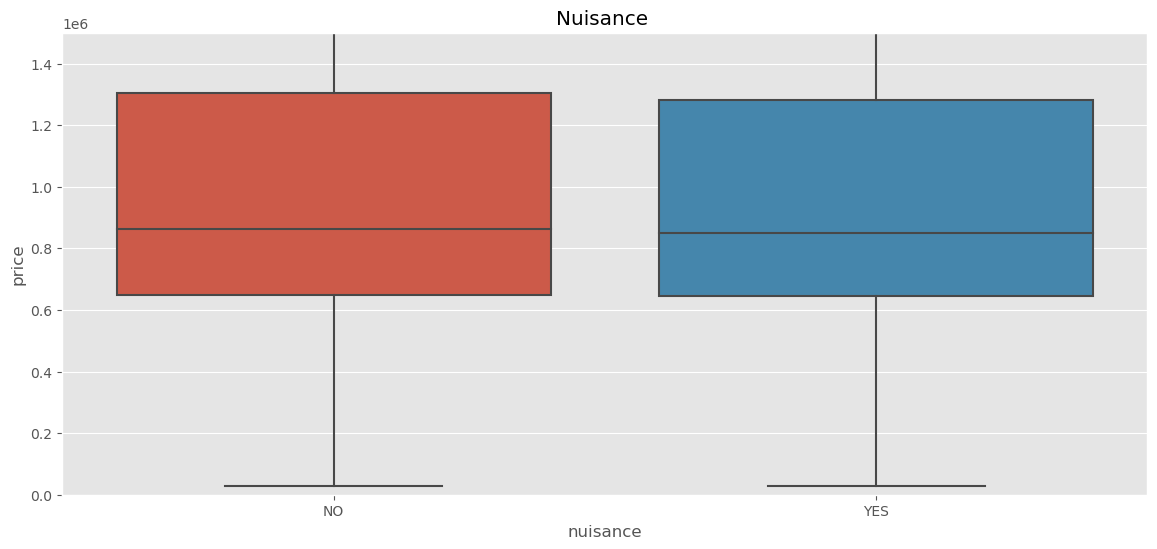

In [46]:
var = 'nuisance'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Nuisance ')
fig.axis(ymin=0, ymax=1500000);

Nuisance does not effect the price

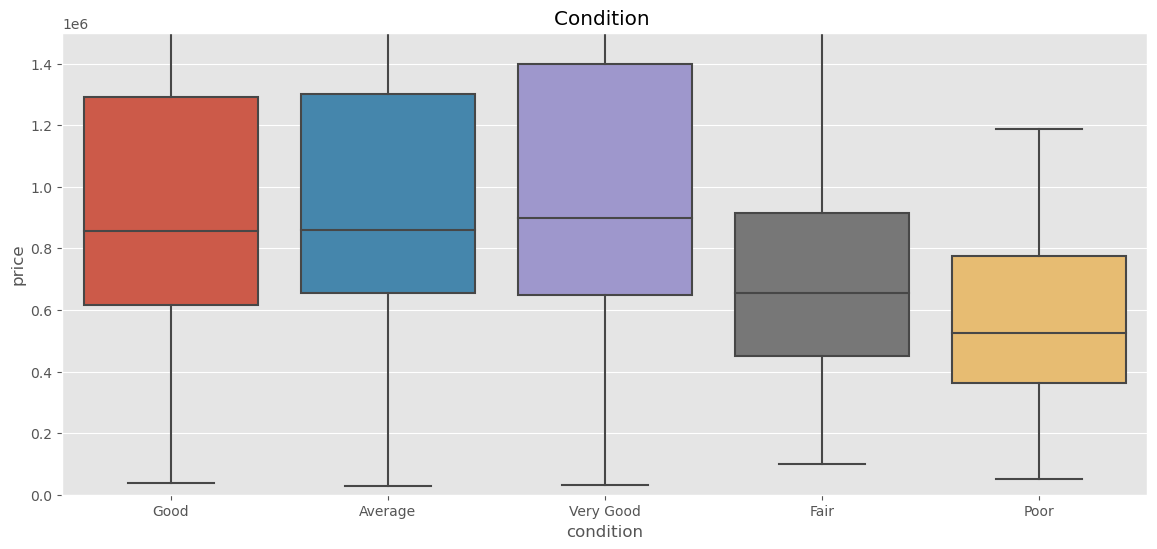

In [47]:
var = 'condition'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Condition ')
fig.axis(ymin=0, ymax=1500000);

Here we can see how condition effect the price. Good,Average, and Very good condition have almost the same price range same as fair and poor condition almost on the same level.

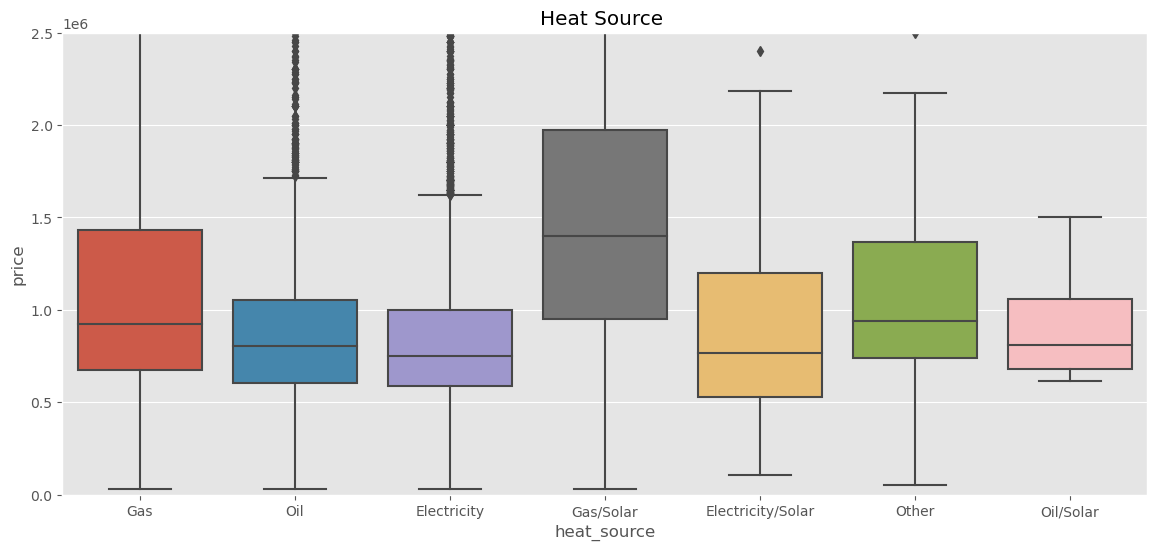

In [48]:
var = 'heat_source'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Heat Source ')
fig.axis(ymin=0, ymax=2500000);

Here we can see that houses with Gas/Solar heat sources are the most expensive Gas heat sources itself slightly cheaper and all the others are pretty much at the similar price range

Next I wont to check what are more cheaper and more expansive cities. For that I wont to pull zipcodes and cities out of address column 

In [49]:
df_clean.head()

price  bedrooms  bathrooms  sqft_living  yr_built  yr_renovated  \
0  675000.0         4        1.0         1180      1969             0   
1  920000.0         5        2.5         2770      1950             0   
2  311000.0         6        2.0         2880      1956             0   
3  775000.0         3        3.0         2160      2010             0   
4  592500.0         2        2.0         1120      2012             0   

                                             address  zipcode      city  
0  2102 Southeast 21st Court, Renton, Washington ...    98055    Renton  
1  11231 Greenwood Avenue North, Seattle, Washing...    11231   Seattle  
2  8504 South 113th Street, Seattle, Washington 9...    98178   Seattle  
3  4079 Letitia Avenue South, Seattle, Washington...    98118   Seattle  
4  2193 Northwest Talus Drive, Issaquah, Washingt...    98027  Issaquah

In [50]:
#droping unnecessary columns 
df_clean = df_clean.drop(columns=['yr_renovated'])
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  \
0      675000.0         4        1.0         1180      1969   
1      920000.0         5        2.5         2770      1950   
2      311000.0         6        2.0         2880      1956   
3      775000.0         3        3.0         2160      2010   
4      592500.0         2        2.0         1120      2012   
...         ...       ...        ...          ...       ...   
30147  665000.0         3        2.5         2100      1979   
30149  719000.0         3        2.5         1270      2007   
30152  800000.0         3        2.0         1620      1995   
30153  775000.0         3        2.5         2570      2006   
30154  500000.0         3        1.5         1200      1965   

                                                 address  zipcode      city  
0      2102 Southeast 21st Court, Renton, Washington ...    98055    Renton  
1      11231 Greenwood Avenue North, Seattle, Washing...    11231   Seattle  
2      8504 South 113th Street, Seattle, Washington 9...    98178   Seattle  
3      4079 Letitia Avenue South, Seattle, Washington...    98118   Seattle  
4      2193 Northwest Talus Drive, Issaquah, Washingt...    98027  Issaquah  
...                                                  ...      ...       ...  
30147  5218 South 302nd Place, Auburn, Washington 980...    98001    Auburn  
30149  8359 11th Avenue Northwest, Seattle, Washingto...    98117   Seattle  
30152  910 Martin Luther King Jr Way, Seattle, Washin...    98122   Seattle  
30153  17127 114th Avenue Southeast, Renton, Washingt...    17127    Renton  
30154  18615 7th Avenue South, Burien, Washington 981...    18615    Burien  

[20819 rows x 8 columns]

In [51]:
#droping unnecessary columns 
df_clean = df_clean.drop(columns=['address'])
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode      city
0      675000.0         4        1.0         1180      1969    98055    Renton
1      920000.0         5        2.5         2770      1950    11231   Seattle
2      311000.0         6        2.0         2880      1956    98178   Seattle
3      775000.0         3        3.0         2160      2010    98118   Seattle
4      592500.0         2        2.0         1120      2012    98027  Issaquah
...         ...       ...        ...          ...       ...      ...       ...
30147  665000.0         3        2.5         2100      1979    98001    Auburn
30149  719000.0         3        2.5         1270      2007    98117   Seattle
30152  800000.0         3        2.0         1620      1995    98122   Seattle
30153  775000.0         3        2.5         2570      2006    17127    Renton
30154  500000.0         3        1.5         1200      1965    18615    Burien

[20819 rows x 7 columns]

When we read the tournament train and test data into memory it takes a lot of memory that could be a problem even if we have a beefy machine. In order to reduce the following function.Although reducing the precision of the features may hurt the performance of the models but here we are dealing with sets of numerical features with low cardinality so the loss will be negligible.

In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
homes = df_clean.select_dtypes(include=numerics)
x = homes.drop(columns = ['price','zipcode']).astype(float)
x = sm.add_constant(x)
y = homes['price'].astype(float)

 Next I want to build the model to see what is R-squared.
 Whereas correlation explains the strength of the relationship between an independent and a dependent variable, R-squared explains the extent to which the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

In [53]:
model = sm.OLS(y, x, data = df2)
model_1 = model.fit()
model_1.summary()

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     994.7
Date:                Sun, 18 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:31:55   Log-Likelihood:            -2.8278e+05
No. Observations:               20819   AIC:                         5.656e+05
Df Residuals:                   20814   BIC:                         5.656e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.068e+06   9.68e+04     21.348      0.000    1.88e+06    2.26e+06
bedrooms    -2.725e+04   1984.655    -13.730      0.000   -3.11e+04   -2.34e+04
bathrooms    5.761e+04   2791.100     20.642      0.000    5.21e+04    6.31e+04
sqft_living   109.1128      3.105     35.138      0.000     103.026     115.199
yr_built     -786.7757     49.849    -15.783      0.000    -884.483    -689.069
==============================================================================
Omnibus:                       57.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.162
Skew:                           0.092   Prob(JB):                     2.86e-12
Kurtosis:                       2.833   Cond. No.                     1.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next I want to check a variance inflation factor (VIF) it provides a measure of multicollinearity among the independent variables in a multiple regression model.
Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 

In [54]:
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['vif'] =[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

variable          vif
0        const  5310.857873
1     bedrooms     1.845619
2    bathrooms     2.409239
3  sqft_living     2.417228
4     yr_built     1.419231

VIF = 1 means no correlation between the independent variable and the other variables
VIF exceeding 5 of 10 means high multicollinearity between this independent variable and the others

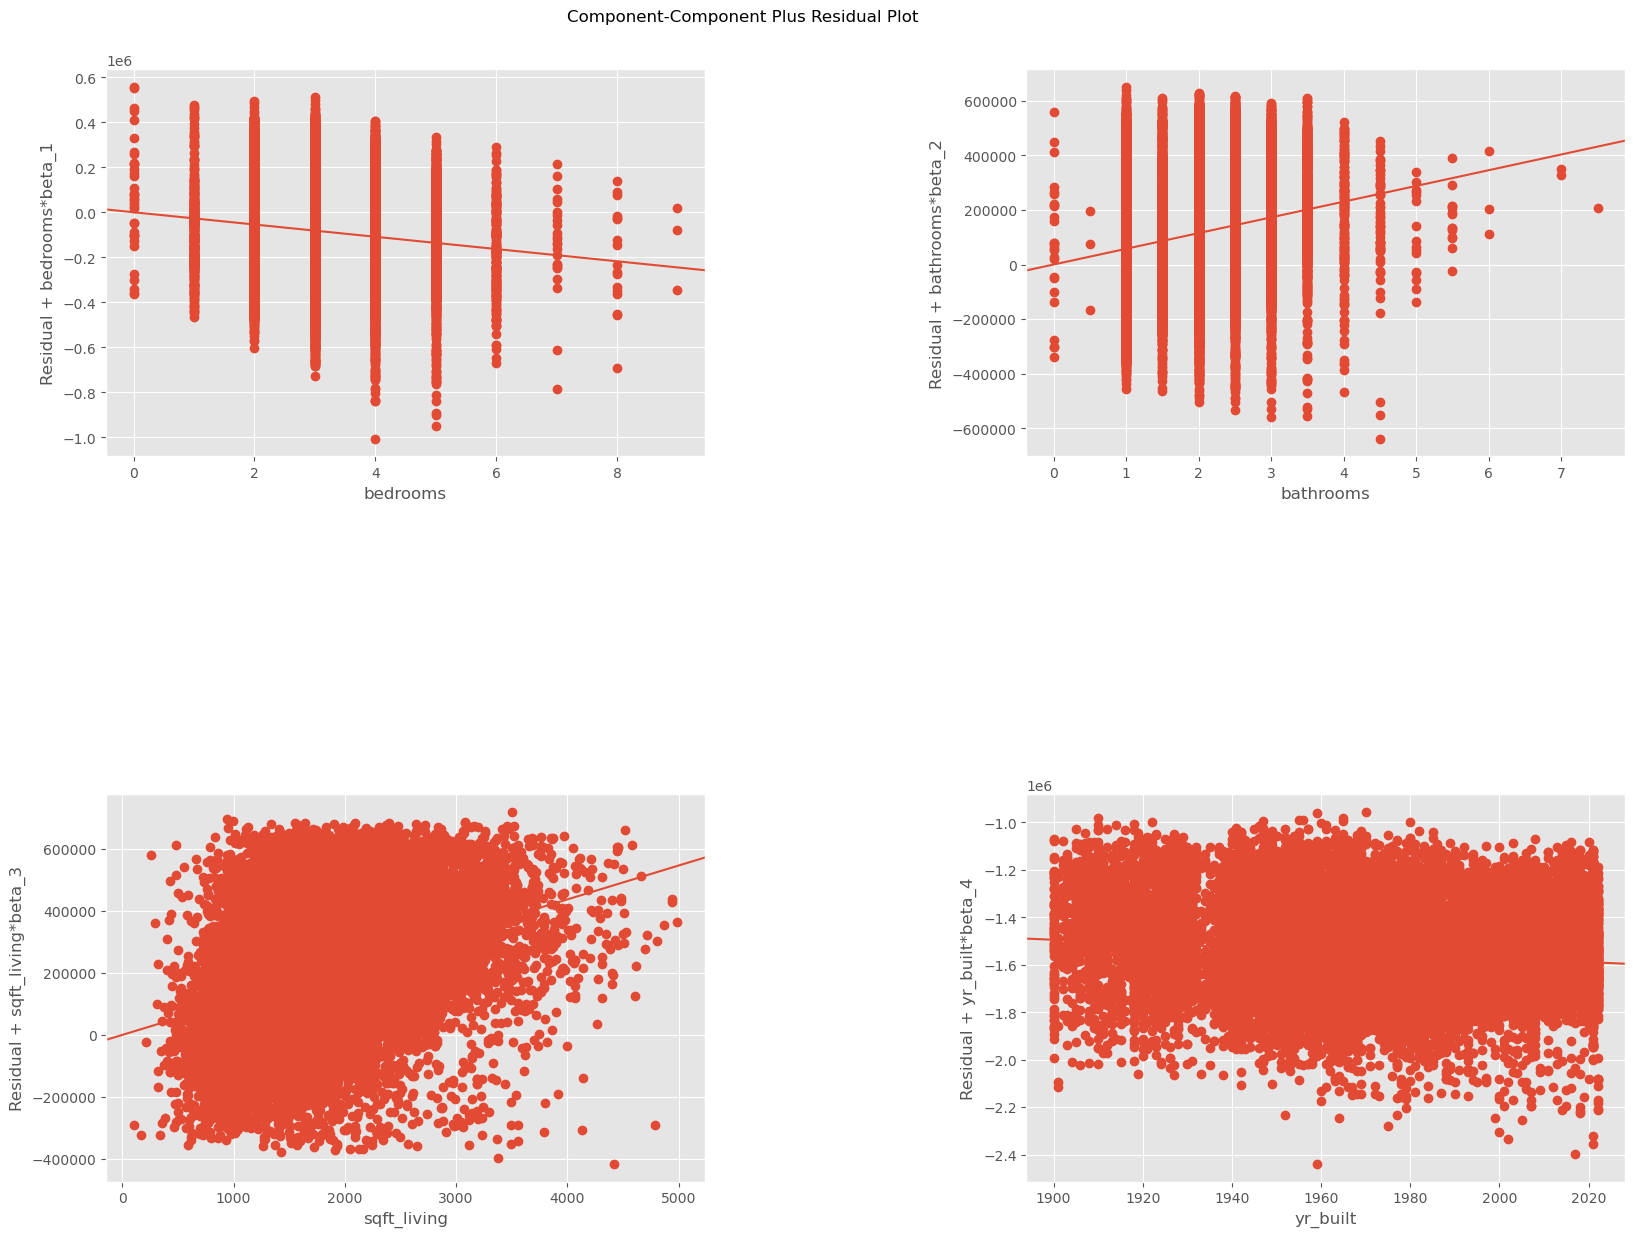

In [55]:
fig = sm.graphics.plot_ccpr_grid(model_1)
fig.set_size_inches(18.5, 20)

Now, I want to check what are 20 the cheapest houses with 4 bedrooms and 3 bathrooms in King County 

In [56]:
homes_4_bed_3_bath = df_clean[(df_clean["bedrooms"] == 4) & (df_clean["bathrooms"] == 3)].sort_values(by=['price'])[:20]
homes_4_bed_3_bath

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
3887   207333.0         4        3.0         2160      1977    11812   
18239  214521.0         4        3.0         3560      2000    98031   
29688  220795.0         4        3.0         2240      1979    98023   
11915  231926.0         4        3.0         2910      2018    11435   
19580  262191.0         4        3.0         3040      2018    31300   
9751   268998.0         4        3.0         2280      1972    17125   
7794   271500.0         4        3.0         2030      1988    98178   
6572   279000.0         4        3.0         2300      1949    19655   
3729   310905.0         4        3.0         3140      1984    15735   
2708   325000.0         4        3.0         1890      1988    30316   
3158   328000.0         4        3.0         2740      1969    29308   
3538   360000.0         4        3.0         2480      1980    13517   
2953   360000.0         4        3.0         1724      1980    15401   
3007   360000.0         4        3.0         2350      1989    10314   
25226  377829.0         4        3.0         1900      1988    98155   
15004  380000.0         4        3.0         1920      1977    11420   
27337  388000.0         4        3.0         1930      1999    35314   
8508   399895.0         4        3.0         2975      2016    98001   
7487   400000.0         4        3.0         1950      1975    12046   
15571  400000.0         4        3.0         1680      1961    26853   

              city  
3887       Seattle  
18239         Kent  
29688  Federal Way  
11915         Kent  
19580  Federal Way  
9751     Shoreline  
7794       Seattle  
6572        SeaTac  
3729   Woodinville  
2708   Federal Way  
3158   Federal Way  
3538      Issaquah  
2953        Renton  
3007          Kent  
25226    Shoreline  
15004       Burien  
27337       Auburn  
8508        Auburn  
7487          Kent  
15571    Covington

If my client would want to buy 4 bedrooms 3 bathrooms house looks like it would have to be  in Seattle, Kent or Federal Way city those are top 3 the cheapest 

In [57]:
homes_4_bed_3_bath = df_clean[(df_clean["bedrooms"] == 4) & (df_clean["bathrooms"] == 3)].sort_values(by=['price'])[-20:]
homes_4_bed_3_bath

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
12884  1175000.0         4        3.0         4450      1984    16113   
28835  1175000.0         4        3.0         2150      1974    12820   
19805  1180000.0         4        3.0         2230      1976    98006   
22549  1180000.0         4        3.0         2270      1972    12411   
4351   1180000.0         4        3.0         2050      1956    16244   
14055  1180000.0         4        3.0         2860      2003    98056   
27789  1180000.0         4        3.0         2490      1978    98006   
20169  1181953.0         4        3.0         3430      2021    98045   
23822  1185000.0         4        3.0         2350      2008    12918   
12108  1185000.0         4        3.0         2130      1936    20401   
12771  1185000.0         4        3.0         2820      1928    98117   
22005  1187500.0         4        3.0         3230      2004    35905   
26597  1190000.0         4        3.0         2720      1940    98102   
2514   1191000.0         4        3.0         3230      1977    98034   
19799  1192000.0         4        3.0         2860      2019    98028   
21110  1195000.0         4        3.0         3370      1996    12516   
21140  1196790.0         4        3.0         3430      2021    98045   
25428  1197647.0         4        3.0         3260      2022    98045   
25572  1198000.0         4        3.0         2640      2021    17513   
18889  1199000.0         4        3.0         1780      1966    10404   

               city  
12884        Renton  
28835      Kirkland  
19805      Bellevue  
22549      Kirkland  
4351       Bellevue  
14055        Renton  
27789      Bellevue  
20169    North Bend  
23822   Woodinville  
12108  Maple Valley  
12771       Seattle  
22005    Snoqualmie  
26597       Seattle  
2514       Kirkland  
19799       Kenmore  
21110        Renton  
21140    North Bend  
25428    North Bend  
25572        Renton  
18889       Bothell

If my client would want to buy 4 bedrooms 3 bathrooms house looks like it would have to be Renton,Kirkland or Bellevue those are the most expensive. But we also can see that in Seattle the are cheep and Expansive houses. Depends on the square footage of the building   

In [59]:
#checking mean number of bedrooms 
df_clean.bedrooms.describe()


count    20819.000000
mean         3.211922
std          0.909726
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedrooms, dtype: float64

In [60]:
#checking mean number of bathrooms 
df_clean.bathrooms.describe()

count    20819.000000
mean         2.092079
std          0.739076
min          0.000000
25%          1.500000
50%          2.000000
75%          2.500000
max          7.500000
Name: bathrooms, dtype: float64

Now I want to check cheap and expensive option of the house with 3 bedrooms and 2 bathrooms 

In [61]:
homes_3_bed_2_bath = df_clean[(df_clean["bedrooms"] == 3) & (df_clean["bathrooms"] == 2)].sort_values(by=['price'])[:20]
homes_3_bed_2_bath

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
28774  203500.0         3        2.0         1770      1978    98023   
29157  205000.0         3        2.0         1890      1978    98001   
7141   205000.0         3        2.0         1600      1976    16914   
8260   209706.0         3        2.0         1710      1997    98023   
4041   213290.0         3        2.0         2340      1968    32537   
2363   216000.0         3        2.0         1810      1988    13335   
26439  222000.0         3        2.0         1870      1963    98056   
2043   223000.0         3        2.0         2500      1967    98023   
23946  225000.0         3        2.0         2380      1981    98118   
10945  231178.0         3        2.0         1270      1947    15548   
19748  235000.0         3        2.0         1400      1977    29220   
26358  243334.0         3        2.0         1310      2021    98056   
25701  243334.0         3        2.0         1290      2021    98056   
950    243334.0         3        2.0         1290      2021    98056   
15678  244500.0         3        2.0         1510      1985    13711   
24389  245986.0         3        2.0         1400      1993    37972   
21224  250000.0         3        2.0         1280      1979    43124   
20228  250000.0         3        2.0         1580      1935    98288   
16354  250000.0         3        2.0         1550      1930    98188   
14930  250000.0         3        2.0         1560      1906    27414   

                city  
28774    Federal Way  
29157         Auburn  
7141          Auburn  
8260     Federal Way  
4041     Federal Way  
2363          Renton  
26439         Renton  
2043     Federal Way  
23946        Seattle  
10945      Shoreline  
19748  Black Diamond  
26358         Renton  
25701         Renton  
950           Renton  
15678     North Bend  
24389         Milton  
21224     North Bend  
20228      Skykomish  
16354        Tukwila  
14930     Ravensdale

The cheapest option are Federal Waywhich is very old house so as Auburn and here we also can see cheap houses in Renton which was one of the most expensive in 4 bed 3 bath.We can see ther are newest houses from 2021 and older with not a big differance in price and square footage  

In [62]:
homes_3_bed_2_bath = df_clean[(df_clean["bedrooms"] == 3) & (df_clean["bathrooms"] == 2)].sort_values(by=['price'])[-20:]
homes_3_bed_2_bath

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
21894  1180000.0         3        2.0         1630      1967    14249   
7730   1180000.0         3        2.0         2010      1922    98112   
13490  1185000.0         3        2.0         1180      1919    98119   
23932  1185000.0         3        2.0         1410      2008    98103   
4743   1185000.0         3        2.0         1390      1922    98103   
7821   1185000.0         3        2.0         1720      1935    98109   
7342   1185000.0         3        2.0         1860      1981    45923   
16715  1185000.0         3        2.0         1250      1975    98027   
21376  1186250.0         3        2.0         1010      1947    18209   
29653  1190000.0         3        2.0         2060      1950    98105   
489    1190000.0         3        2.0         1580      2016    98119   
4277   1190000.0         3        2.0         2050      1941    98103   
1195   1191000.0         3        2.0         1740      1997    44220   
18948  1195000.0         3        2.0         1690      1906    98105   
20318  1195000.0         3        2.0         1170      1963    16611   
26995  1195000.0         3        2.0         1640      2020    62896   
11841  1195000.0         3        2.0         1920      1907    98115   
12443  1196000.0         3        2.0         1690      1940    98117   
27218  1197000.0         3        2.0         1760      1914    11225   
16136  1199900.0         3        2.0         1500      1942    98116   

                 city  
21894        Kirkland  
7730          Seattle  
13490         Seattle  
23932         Seattle  
4743          Seattle  
7821          Seattle  
7342       North Bend  
16715        Issaquah  
21376       Shoreline  
29653         Seattle  
489           Seattle  
4277          Seattle  
1195       North Bend  
18948         Seattle  
20318        Bellevue  
26995  West Frankfort  
11841         Seattle  
12443         Seattle  
27218         Seattle  
16136         Seattle

I will use get_dummies function which we use to convert categorical variables into dummy or indicator variables. A dummy or indicator variable can have a value of 0 or 1.

In [63]:
df_clean = pd.get_dummies(df_clean, columns=['city'], drop_first=True)
df_clean.head()

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
0  675000.0         4        1.0         1180      1969    98055   
1  920000.0         5        2.5         2770      1950    11231   
2  311000.0         6        2.0         2880      1956    98178   
3  775000.0         3        3.0         2160      2010    98118   
4  592500.0         2        2.0         1120      2012    98027   

   city_1035 Bergslien St  city_1040 SE Hawthorne Blvd  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   city_108 Foothill Blvd  city_1249 Commonwealth Ave  ...  city_West Bend  \
0                       0                           0  ...               0   
1                       0                           0  ...               0   
2                       0                           0  ...               0   
3                       0                           0  ...               0   
4                       0                           0  ...               0   

   city_West Frankfort  city_West Harrison  city_West Homestead  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   city_West Point  city_West Tisbury  city_White Center  city_Whittier  \
0                0                  0                  0              0   
1                0                  0                  0              0   
2                0                  0                  0              0   
3                0                  0                  0              0   
4                0                  0                  0              0   

   city_Woodinville  city_Yaphank  
0                 0             0  
1                 0             0  
2                 0             0  
3                 0             0  
4                 0             0  

[5 rows x 267 columns]

In [64]:
df_clean = df_clean.drop(columns=['city_1035 Bergslien St','city_1040 SE Hawthorne Blvd','city_108 Foothill Blvd',
                                 'city_1249 Commonwealth Ave'])
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
0      675000.0         4        1.0         1180      1969    98055   
1      920000.0         5        2.5         2770      1950    11231   
2      311000.0         6        2.0         2880      1956    98178   
3      775000.0         3        3.0         2160      2010    98118   
4      592500.0         2        2.0         1120      2012    98027   
...         ...       ...        ...          ...       ...      ...   
30147  665000.0         3        2.5         2100      1979    98001   
30149  719000.0         3        2.5         1270      2007    98117   
30152  800000.0         3        2.0         1620      1995    98122   
30153  775000.0         3        2.5         2570      2006    17127   
30154  500000.0         3        1.5         1200      1965    18615   

       city_1414 Pinehurst Rd  city_1710 Belle Isle Blvd  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
30147                       0                          0   
30149                       0                          0   
30152                       0                          0   
30153                       0                          0   
30154                       0                          0   

       city_17122 W Interstate 10  city_175 W 18th Ave  ...  city_West Bend  \
0                               0                    0  ...               0   
1                               0                    0  ...               0   
2                               0                    0  ...               0   
3                               0                    0  ...               0   
4                               0                    0  ...               0   
...                           ...                  ...  ...             ...   
30147                           0                    0  ...               0   
30149                           0                    0  ...               0   
30152                           0                    0  ...               0   
30153                           0                    0  ...               0   
30154                           0                    0  ...               0   

       city_West Frankfort  city_West Harrison  city_West Homestead  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   
3                        0                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
30147                    0                   0                    0   
30149                    0                   0                    0   
30152                    0                   0                    0   
30153                    0                   0                    0   
30154                    0                   0                    0   

       city_West Point  city_West Tisbury  city_White Center  city_Whittier  \
0                    0                  0                  0              0   
1                    0                  0                  0              0   
2                    0                  0                  0              0   
3                    0                  0                  0              0   
4                    0                  0                  0              0   
...                ...                ...                ...            ...   
30147                0                  0                  0         

In [65]:
df_clean = df_clean.drop(columns=['city_1414 Pinehurst Rd','city_1710 Belle Isle Blvd','city_17122 W Interstate 10',
                                  'city_175 W 18th Ave'])
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
0      675000.0         4        1.0         1180      1969    98055   
1      920000.0         5        2.5         2770      1950    11231   
2      311000.0         6        2.0         2880      1956    98178   
3      775000.0         3        3.0         2160      2010    98118   
4      592500.0         2        2.0         1120      2012    98027   
...         ...       ...        ...          ...       ...      ...   
30147  665000.0         3        2.5         2100      1979    98001   
30149  719000.0         3        2.5         1270      2007    98117   
30152  800000.0         3        2.0         1620      1995    98122   
30153  775000.0         3        2.5         2570      2006    17127   
30154  500000.0         3        1.5         1200      1965    18615   

       city_35th Ave SW & SW Holden  city_4th Ave  city_721 NW 21st Ave  \
0                                 0             0                     0   
1                                 0             0                     0   
2                                 0             0                     0   
3                                 0             0                     0   
4                                 0             0                     0   
...                             ...           ...                   ...   
30147                             0             0                     0   
30149                             0             0                     0   
30152                             0             0                     0   
30153                             0             0                     0   
30154                             0             0                     0   

       city_95 Brown St  ...  city_West Bend  city_West Frankfort  \
0                     0  ...               0                    0   
1                     0  ...               0                    0   
2                     0  ...               0                    0   
3                     0  ...               0                    0   
4                     0  ...               0                    0   
...                 ...  ...             ...                  ...   
30147                 0  ...               0                    0   
30149                 0  ...               0                    0   
30152                 0  ...               0                    0   
30153                 0  ...               0                    0   
30154                 0  ...               0                    0   

       city_West Harrison  city_West Homestead  city_West Point  \
0                       0                    0                0   
1                       0                    0                0   
2                       0                    0                0   
3                       0                    0                0   
4                       0                    0                0   
...                   ...                  ...              ...   
30147                   0                    0                0   
30149                   0                    0                0   
30152                   0                    0                0   
30153                   0                    0                0   
30154                   0                    0                0   

       city_West Tisbury  city_White Center  city_Whittier  city_Woodinville  \
0                      0                  0              0                 0   
1                      0                  0              0                 0   
2                      0                  0              0                 0   
3                      0                  0              0                 0   
4                      0                  0              0                 0   
...                  ...                ...            ...               ...   
30147                  0                  0       

In [66]:
df_clean = df_clean.drop(columns=['city_35th Ave SW & SW Holden','city_4th Ave','city_721 NW 21st Ave',
                                  'city_95 Brown St'])
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
0      675000.0         4        1.0         1180      1969    98055   
1      920000.0         5        2.5         2770      1950    11231   
2      311000.0         6        2.0         2880      1956    98178   
3      775000.0         3        3.0         2160      2010    98118   
4      592500.0         2        2.0         1120      2012    98027   
...         ...       ...        ...          ...       ...      ...   
30147  665000.0         3        2.5         2100      1979    98001   
30149  719000.0         3        2.5         1270      2007    98117   
30152  800000.0         3        2.0         1620      1995    98122   
30153  775000.0         3        2.5         2570      2006    17127   
30154  500000.0         3        1.5         1200      1965    18615   

       city_Algona  city_Altoona  city_Anchorage  city_Ardoch  ...  \
0                0             0               0            0  ...   
1                0             0               0            0  ...   
2                0             0               0            0  ...   
3                0             0               0            0  ...   
4                0             0               0            0  ...   
...            ...           ...             ...          ...  ...   
30147            0             0               0            0  ...   
30149            0             0               0            0  ...   
30152            0             0               0            0  ...   
30153            0             0               0            0  ...   
30154            0             0               0            0  ...   

       city_West Bend  city_West Frankfort  city_West Harrison  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   
...               ...                  ...                 ...   
30147               0                    0                   0   
30149               0                    0                   0   
30152               0                    0                   0   
30153               0                    0                   0   
30154               0                    0                   0   

       city_West Homestead  city_West Point  city_West Tisbury  \
0                        0                0                  0   
1                        0                0                  0   
2                        0                0                  0   
3                        0                0                  0   
4                        0                0                  0   
...                    ...              ...                ...   
30147                    0                0                  0   
30149                    0                0                  0   
30152                    0                0                  0   
30153                    0                0                  0   
30154                    0                0                  0   

       city_White Center  city_Whittier  city_Woodinville  city_Yaphank  
0                      0              0                 0             0  
1                      0              0                 0             0  
2                      0              0                 0             0  
3                      0              0                 0             0  
4                      0              0                 0             0  
...                  ...            ...               ...           ...  
30147                  0              0                 0             0  
30149                  0              0                 0             0  
30152                  0              0             

In [69]:
df_clean

price  bedrooms  bathrooms  sqft_living  yr_built  zipcode  \
0      675000.0         4        1.0         1180      1969    98055   
1      920000.0         5        2.5         2770      1950    11231   
2      311000.0         6        2.0         2880      1956    98178   
3      775000.0         3        3.0         2160      2010    98118   
4      592500.0         2        2.0         1120      2012    98027   
...         ...       ...        ...          ...       ...      ...   
30147  665000.0         3        2.5         2100      1979    98001   
30149  719000.0         3        2.5         1270      2007    98117   
30152  800000.0         3        2.0         1620      1995    98122   
30153  775000.0         3        2.5         2570      2006    17127   
30154  500000.0         3        1.5         1200      1965    18615   

       city_Algona  city_Altoona  city_Anchorage  city_Ardoch  ...  \
0                0             0               0            0  ...   
1                0             0               0            0  ...   
2                0             0               0            0  ...   
3                0             0               0            0  ...   
4                0             0               0            0  ...   
...            ...           ...             ...          ...  ...   
30147            0             0               0            0  ...   
30149            0             0               0            0  ...   
30152            0             0               0            0  ...   
30153            0             0               0            0  ...   
30154            0             0               0            0  ...   

       city_West Bend  city_West Frankfort  city_West Harrison  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   
...               ...                  ...                 ...   
30147               0                    0                   0   
30149               0                    0                   0   
30152               0                    0                   0   
30153               0                    0                   0   
30154               0                    0                   0   

       city_West Homestead  city_West Point  city_West Tisbury  \
0                        0                0                  0   
1                        0                0                  0   
2                        0                0                  0   
3                        0                0                  0   
4                        0                0                  0   
...                    ...              ...                ...   
30147                    0                0                  0   
30149                    0                0                  0   
30152                    0                0                  0   
30153                    0                0                  0   
30154                    0                0                  0   

       city_White Center  city_Whittier  city_Woodinville  city_Yaphank  
0                      0              0                 0             0  
1                      0              0                 0             0  
2                      0              0                 0             0  
3                      0              0                 0             0  
4                      0              0                 0             0  
...                  ...            ...               ...           ...  
30147                  0              0                 0             0  
30149                  0              0                 0             0  
30152                  0              0             

Using train_test_split which is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

In [70]:
X, y = (df_clean.drop('price',axis=1), df_clean['price'])

In [71]:
#split data into train, test and validation 
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=2)

In [73]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.45834692640550145

In [74]:
lr.score(X_val,y_val)

0.45457633929407193

In [75]:
#function to calculate adjusted r2-is the proportion of the variance in the response variable 
#that can be explained by the predictor variables in a linear regression model.
#n = number of observations
#k = the number of predictor variables

def R_adjusted(r2, n, k):
    return 1- ((1-r2)*(n-1))/(n-k-1)

In [76]:
#Mean Absolute Error (MAE)- 
#we’re just looking at the absolute difference between the data and the model’s predictions
#Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model 
#a small MAE suggests the model is great at prediction
#a large MAE suggests that your model may have trouble in certain areas. 
#A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen).

def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))
#When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. 
#the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). 
#By default, the score method does not need the actual predictions. So, when we call: clf.score(X_test, y_test)
#it makes predictions using X_test under the hood and uses those predictions to calculate accuracy score. 
#Think of score as a shorthand to calculate accuracy since it is such a common metric. 

In [77]:
# Logistic Regression fits a line to a dataset and then returns the probability 
#that a new sample belongs to one of the two classes according to its location with respect to the line.
lr = LinearRegression()
lr.fit(X_train, y_train)
#fit best values 

#class prediction
##function to calculate adjusted r2-is the proportion of the variance in the response variable 
val_set_pred = lr.predict(X_val)
r2 = lr.score(X_val, y_val) 
n = len(y_val) #n = number of observations
k = len(X_train.columns)#k = the number of predictor variables



mean_square_error = mae(y_val, val_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train, y_train)
R2_val = lr.score(X_val, y_val)

nl = '\n'

print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')
#model off by 116K

mae:116866.7670594656
r2_train:0.45834692640550145
r2_val0.45457633929407193
r2_adj0.41913566141755476


Using polynomial regression model this is used in machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line, which may not be possible with simple linear regression. It is used when linear regression models may not adequately capture the complexity of the relationship

In [78]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [79]:
#Generate polynomial and interaction features.
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.506792972634892

In [80]:
lr_poly.score(X_val_poly, y_val)

0.07679232236105527

In [81]:
X_train_poly

array([[1. , 2. , 2. , ..., 0. , 0. , 0. ],
       [1. , 3. , 3. , ..., 0. , 0. , 0. ],
       [1. , 4. , 2. , ..., 0. , 0. , 0. ],
       ...,
       [1. , 2. , 2. , ..., 0. , 0. , 0. ],
       [1. , 4. , 2.5, ..., 0. , 0. , 0. ],
       [1. , 4. , 2.5, ..., 0. , 0. , 0. ]])

Using LASSO modeling which is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. Lasso and Ridge lambda tuning models were applied to standardized data, as well as Step Ordinary Least Squares modeling, removing influential points and outliers. A Lasso model was chosen for final testing in order to avoid overfitting and data loss while achieving a maximal fit.

In [82]:
#I want to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV(tol=0.1)
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.48824109570225194

In [83]:
lasso.score(X_val_poly_scaled, y_val)

0.47671728151933124

In [84]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV(tol=0.1)
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

0.46720025168431056

# Regression Results

In [85]:
def diagnostic_plots(y_pred, y_true):
    resid = y_pred - y_true
    
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

x, y: string, series, or vector array
Input variables. If strings, these should correspond with column names in data. 
When pandas objects are used, axes will be labeled with the series name.

fit_regbool, optional
If True, estimate and plot a regression model relating the x and y variables

x_ci“ci”, “sd”, int in [0, 100] or None, optional
Size of the confidence interval used when plotting a central tendency for discrete values of x. 
If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

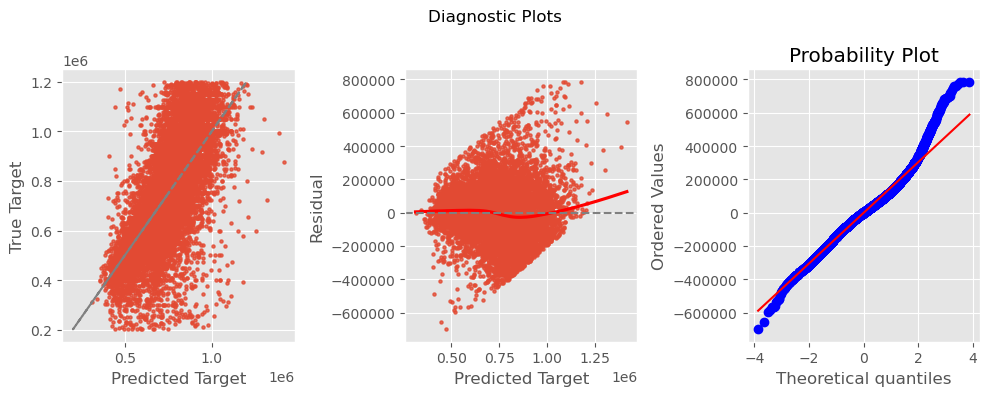

In [86]:
#Plot data and a linear regression model fit.
diagnostic_plots(lr.predict(X_train), y_train)

#1
#y- actual value
#better at predicting lower proce houses

#2- y- distance away from prediction- heterskadistity -variance isnt contant 

#3- qq plot- quantiles of 2 distribution - normal distribution (x) , quantilies of obesved data (y)

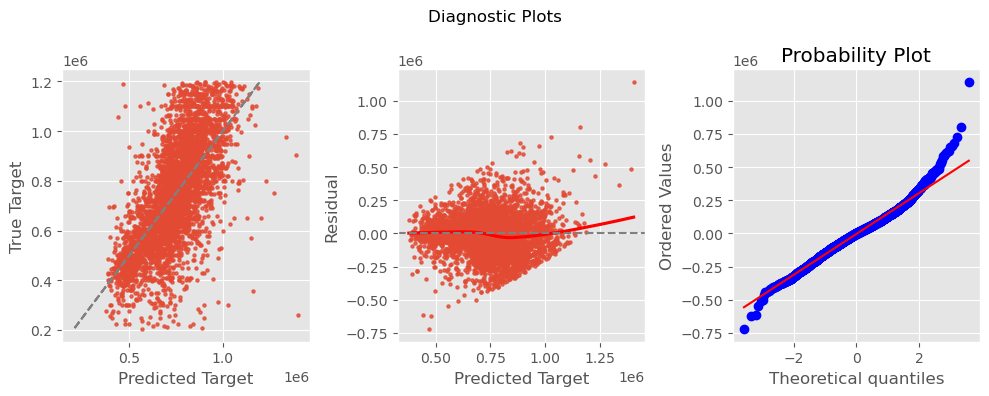

In [87]:
diagnostic_plots(lr.predict(X_val), y_val)

Now I also want to use .hist() it will show how frequently a value falls into a particular bin.
The height of each bar represents the number of values in the data set that fall within a particular bin.

<AxesSubplot:>

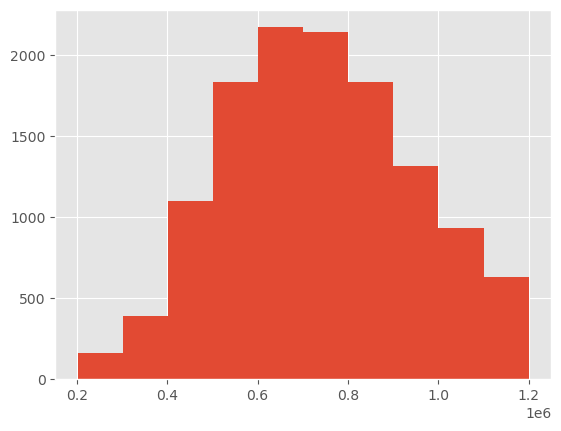

In [88]:
y_train.hist()

we can see normal distribution

In [90]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)


0.506792972634892

In [91]:

lr_poly.score(X_val_poly, y_val)

0.07679232236105527

Lasso - method of regulization , keeps most important features and zeros everything else out , stronger lambda the stronger affect.Lasso is a regularization constraint introduced to the objective function of linear models in order to prevent overfitting of the predictive model to the data

In [92]:
alphalist_l = 10**(np.linspace(-4,4,400))
err_vec_val = np.zeros(len(alphalist_l))
err_vec_train = np.zeros(len(alphalist_l))

for i,curr_alpha in enumerate(alphalist_l):

    # the use of a sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,:].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,:].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+14, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.545e+13, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.345e+13, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.339e+13, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+13, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.002e+12, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.393e+12, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+12, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+12, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+11, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+11, tolerance: 5.457e+10
  model = cd_fast.enet_coordinate_descent(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Log-log plots display data in two dimensions where both axes use logarithmic scales. When one variable changes as a constant power of another, a log-log graph shows the relationship as a straight line.

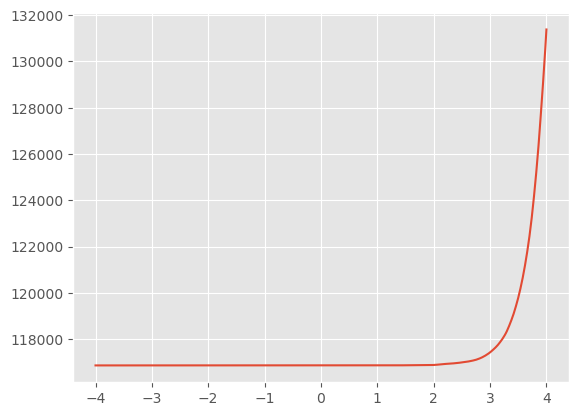

In [93]:
plt.plot(np.log10(alphalist_l), err_vec_val)

Using min() function is to find out the minimum value from the array elements or the particular array axis

In [94]:
np.min(err_vec_val)

116864.04445260795

Next I want to use numpy. argmin() method which returns the indices of the minimum values along an axis.  It's similar to the Numpy minimum function, but instead of returning the minimum value, it returns the index of the minimum value.

In [95]:
alphalist_l[np.argmin(err_vec_val)]

6.486793534788508

In [96]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_tval = std.transform(X_val.values)
X_te = std.transform(X_test.values)
lasso_model = Lasso(alpha = alphalist_l[np.argmin(err_vec_val)])
lasso_model.fit(X_tr,y_train)

Lasso(alpha=6.486793534788508)

In statistics and machine learning, lasso  is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model

In [97]:
val_set_pred = lasso_model.predict(X_tval)
train_set_pred = lasso_model.predict(X_tr)

Checking MAE-measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. R2  is a measure that provides information about the goodness of fit of a model. R-squared between 0.50 to 0.99 is acceptable in social science research especially when most of the explanatory variables are statistically significant., and R2 adjasted can provide a more precise view of the correlation by also taking into account how many independent variables are added to a particular model against which the stock index is measured

In [98]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, val_set_pred)
n = len(X_val)
k = len(X_val.columns)

mean_square_error = mae(y_val, val_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred)
R2_val = r2_score(y_val, val_set_pred)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:116864.04445260795
r2_train:0.4583445998868758
r2_val0.4546084341396024
r2_adj0.41916984173015215


In [99]:
coef = list(lasso_model.coef_)
coef = [int(round(x, 0)) for x in coef]
coef_list = list(zip(X_train.columns, coef))

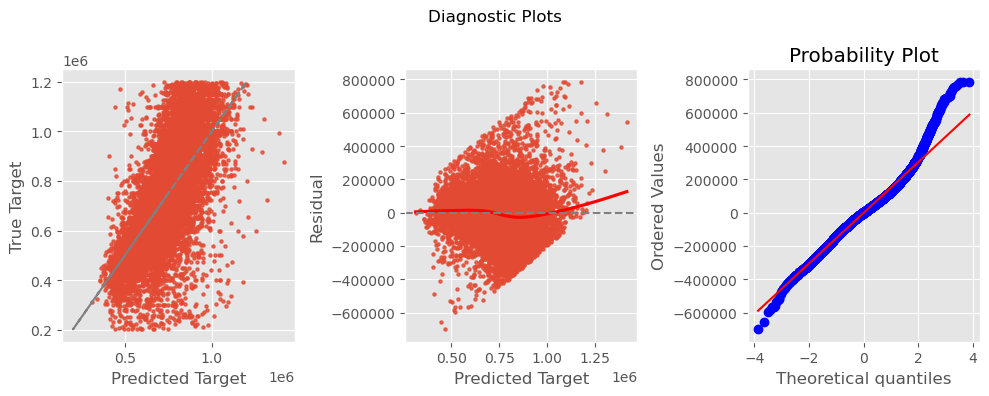

In [100]:
diagnostic_plots(lasso_model.predict(X_tr), y_train)

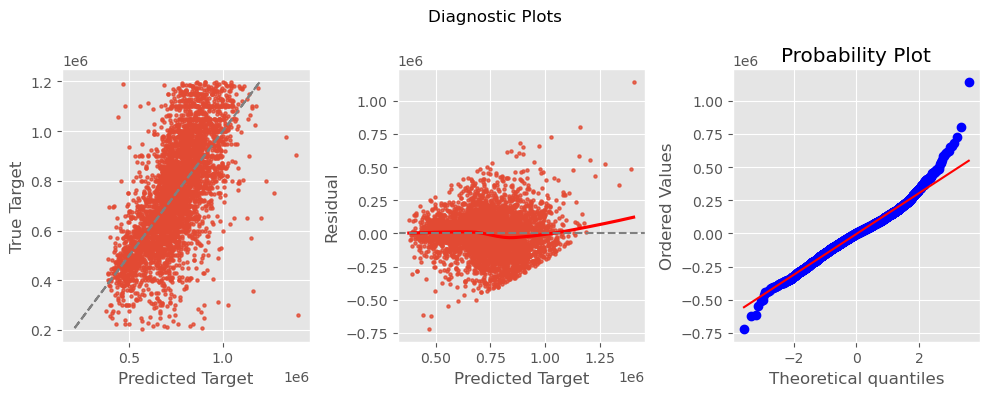

In [101]:

diagnostic_plots(lasso_model.predict(X_tval), y_val)

In [102]:

coef = list(lasso_model.coef_)
coef = [int(round(x, 0)) for x in coef]
coef_list = list(zip(X_train.columns, coef))
keep_list = list(filter(lambda x: x[1] != 0, coef_list))
final_col_list = [x[0] for x in keep_list]
df_coef = pd.DataFrame(keep_list, columns = ('feature', 'coef'))
df_coef.sort_values('coef', ascending=False).head(30)

feature   coef
2            sqft_living  97786
1              bathrooms  20944
80         city_Kirkland  17404
15         city_Bellevue  15375
150         city_Redmond  11947
161       city_Sammamish   8600
4                zipcode   7495
20          city_Bothell   4838
192    city_West Babylon   4690
198     city_Woodinville   4491
74           city_Kansas   3959
73         city_Issaquah   3914
164        city_Scituate   3647
63           city_Golden   3492
84         city_Leadwood   3480
117       city_Newcastle   3250
13      city_Beach Haven   3083
94        city_Menomonie   3056
168    city_Sellersville   2907
90     city_Martinsville   2907
126    city_North Vernon   2787
137       city_Pea Ridge   2731
194  city_West Frankfort   2519
48     city_East Windsor   2472
145       city_Princeton   2360
95    city_Mercer Island   2354
133  city_Palisades Park   2331
21        city_Brentwood   2266
17         city_Billings   2247
108        city_Moorhead   2057

A regression coefficient describes the size and direction of the relationship between a predictor and the response variable. Coefficients are the numbers by which the values of the term are multiplied in a regression equation.The  estimated coefficient for a predictor shows the change in the link function for each unit change in the predictor. The link function, the reference event for the response, and the reference levels for categorical predictors included in the model are only a few of the parts of the analysis that affect how the coefficient and probability are related. Generally, positive coefficients make the event more likely and negative coefficients make the event less likely. An estimated coefficient near 0 implies that the effect of the predictor is small

In [103]:
X_train_n = X_train[X_train.columns.intersection(final_col_list)]
X_val_n = X_val[X_val.columns.intersection(final_col_list)]
X_test_n = X_test[X_test.columns.intersection(final_col_list)]
X_train_n.head()

bedrooms  bathrooms  sqft_living  yr_built  zipcode  city_Algona  \
18247         2        2.0         1580      2021    22529            0   
4515          3        3.0         2060      1909    98118            0   
8517          4        2.0         1730      1967    98108            0   
27912         3        1.0         1050      1969    98023            0   
20291         3        2.0         2080      1959    98002            0   

       city_Altoona  city_Anchorage  city_Ardoch  city_Asbury Park  ...  \
18247             0               0            0                 0  ...   
4515              0               0            0                 0  ...   
8517              0               0            0                 0  ...   
27912             0               0            0                 0  ...   
20291             0               0            0                 0  ...   

       city_Wall Township  city_Washington  city_Waukon  city_West Babylon  \
18247                   0                0            0                  0   
4515                    0                0            0                  0   
8517                    0                0            0                  0   
27912                   0                0            0                  0   
20291                   0                0            0                  0   

       city_West Bend  city_West Frankfort  city_West Homestead  \
18247               0                    0                    0   
4515                0                    0                    0   
8517                0                    0                    0   
27912               0                    0                    0   
20291               0                    0                    0   

       city_West Tisbury  city_Whittier  city_Woodinville  
18247                  0              0                 0  
4515                   0              0                 0  
8517                   0              0                 0  
27912                  0              0                 0  
20291                  0              0                 0  

[5 rows x 199 columns]

In [104]:
lr = LinearRegression()
lr.fit(X_train_n, y_train)

val_set_pred_n = lr.predict(X_val_n)
r2 = lr.score(X_val_n, y_val)
n = len(X_val_n)
k = len(X_train_n.columns)


mean_square_error = mae(y_val, val_set_pred_n)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train_n, y_train)
R2_val = lr.score(X_val_n, y_val)

nl = '\n'

print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:116866.76705941725
r2_train:0.45834692640550145
r2_val0.45457633929429986
r2_adj0.42719508084817615


In [105]:
alphalist_r = 10**(np.linspace(-2,10,200))
err_vec_val = np.zeros(len(alphalist_r))
err_vec_train = np.zeros(len(alphalist_r))

for i,curr_alpha in enumerate(alphalist_r):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train_n.values, y_train)
    
    val_set_pred_r = pipe.predict(X_val_n.values)
    err_vec_val[i] = mae(y_val, val_set_pred_r)

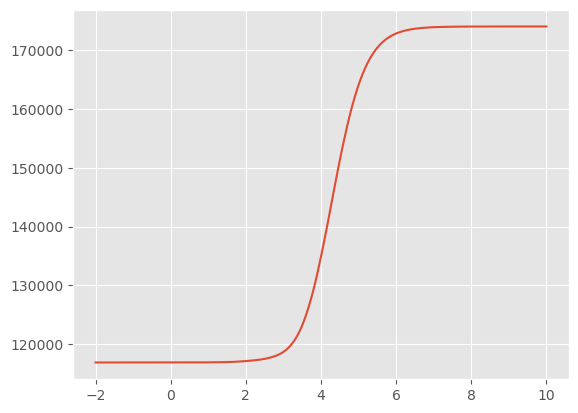

In [106]:
plt.plot(np.log10(alphalist_r), err_vec_val)

In [107]:
np.min(err_vec_val)

116866.77475313467

In [108]:
alphalist_r[np.argmin(err_vec_val)]

0.01

In [109]:
std = StandardScaler()
std.fit(X_train_n.values)
X_tr_r= std.transform(X_train_n.values)
X_tval_r= std.transform(X_val_n.values)
X_te_r = std.transform(X_test_n.values)
ridge_model = Ridge(alpha = alphalist_r[np.argmin(err_vec_val)])
ridge_model.fit(X_tr_r,y_train)

Ridge(alpha=0.01)

In [110]:
val_set_pred_r = ridge_model.predict(X_tval_r)
train_set_pred_r = ridge_model.predict(X_tr_r)

In [111]:
r2 = r2_score(y_val, val_set_pred_r)
n = len(X_val_n)
k = len(X_val_n.columns)

mean_square_error = mae(y_val, val_set_pred_r)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred_r)
R2_val = r2_score(y_val, val_set_pred_r)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_adj{R2_adj}')

mae:116866.77475313467
r2_train:0.4583469263733263
r2_val0.4545763916758545
r2_adj0.42719513585937996


In [112]:
coef = [int(x) for x in  ridge_model.coef_]
coef_list = list(zip(X_train_n.columns, coef))
coef_list
df_coef2 = pd.DataFrame(coef_list, columns = ('feature', 'coef'))
df_coef2.sort_values('coef', ascending=False)

feature   coef
2         sqft_living  97828
1           bathrooms  20942
80      city_Kirkland  16686
15      city_Bellevue  14750
150      city_Redmond  11384
..                ...    ...
33     city_Covington -35069
151       city_Renton -38960
78          city_Kent -57708
57   city_Federal Way -63183
10        city_Auburn -66901

[199 rows x 2 columns]

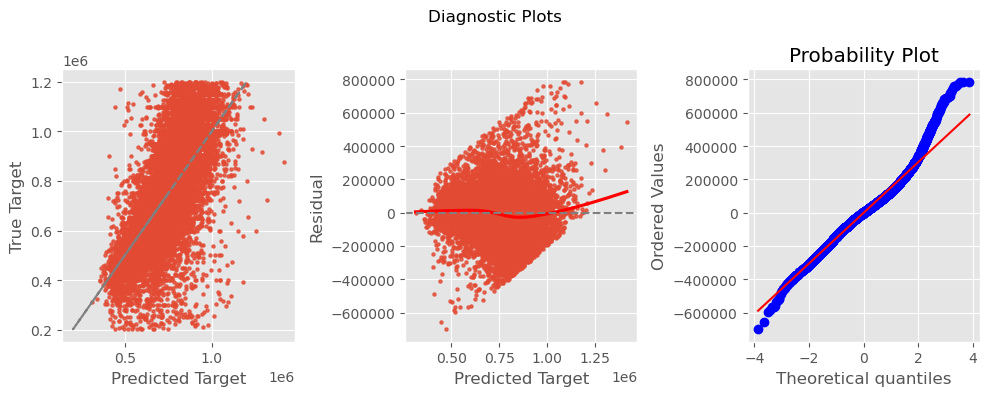

In [113]:

diagnostic_plots(ridge_model.predict(X_tr_r), y_train)

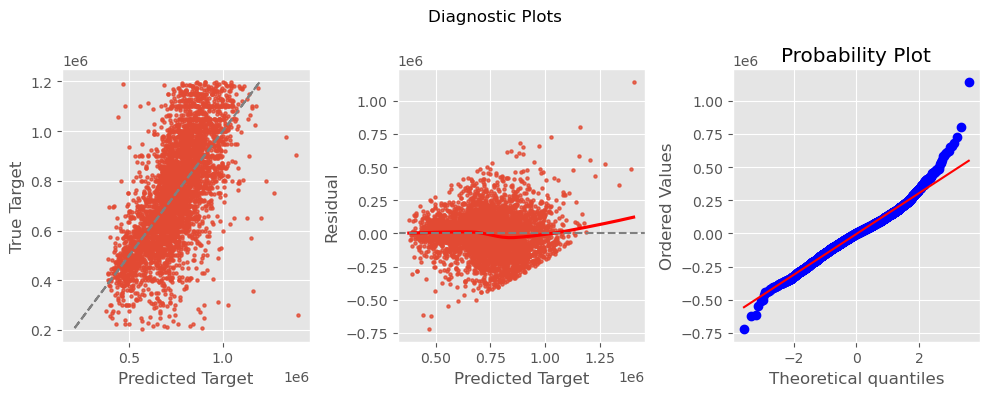

In [114]:
diagnostic_plots(ridge_model.predict(X_tval_r), y_val)

In [115]:
test_set_pred = lasso_model.predict(X_te)
r2 = r2_score(y_test, test_set_pred )
n = len(X_test)
k = len(X_test.columns)

mean_square_error = mae(y_test, test_set_pred)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred)
R2_val = r2_score(y_val, val_set_pred)
R2_test = r2_score(y_test, test_set_pred)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:116228.02002535881
r2_train:0.4583445998868758
r2_val0.4546084341396024
r2_test0.43088623138510573
r2_adj0.3939062116285995


In [116]:
test_set_pred_n = lr.predict(X_test_n)
r2 = lr.score(X_test_n, y_test)
n = len(X_test_n)
k = len(X_test_n.columns)


mean_square_error = mae(y_test, test_set_pred_n)
R2_adj = R_adjusted(r2, n, k)
R2_train = lr.score(X_train_n, y_train)
R2_val = lr.score(X_val_n, y_val)
R2_test = r2_score(y_test, test_set_pred_n)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:116248.79928201005
r2_train:0.45834692640550145
r2_val0.45457633929429986
r2_test0.4307123542872573
r2_adj0.4021330804484995


In [117]:
test_set_pred_r = ridge_model.predict(X_te_r)
r2 = r2_score(y_test, test_set_pred_r)
n = len(X_test_n)
k = len(X_test_n.columns)

mean_square_error = mae(y_test, test_set_pred_r)
R2_adj = R_adjusted(r2, n, k)
R2_train = r2_score(y_train, train_set_pred_r)
R2_val = r2_score(y_val, val_set_pred_r)
R2_test = r2_score(y_test, test_set_pred_r)

nl = '\n'


print(f'mae:{mean_square_error}{nl}r2_train:{R2_train}{nl}r2_val{R2_val}{nl}r2_test{R2_test}{nl}r2_adj{R2_adj}')

mae:116248.73989474322
r2_train:0.4583469263733263
r2_val0.4545763916758545
r2_test0.4307129851493592
r2_adj0.4021337429810248


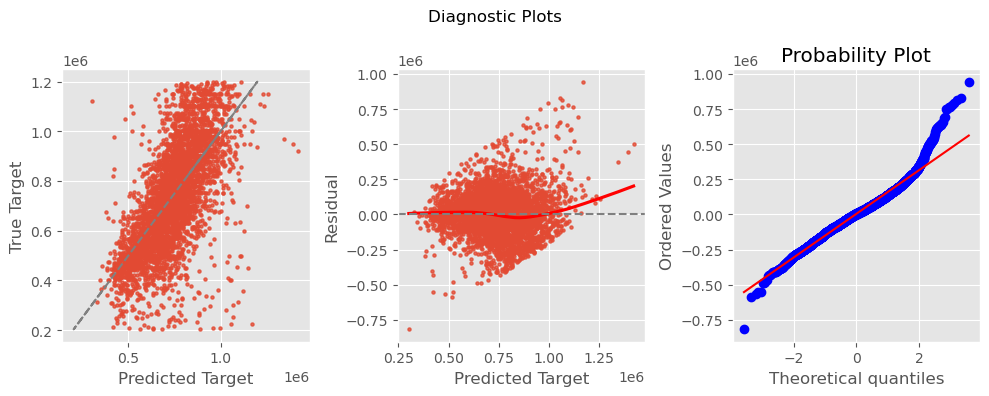

In [118]:
diagnostic_plots(ridge_model.predict(X_te_r), y_test)

<Figure size 900x1100 with 0 Axes>

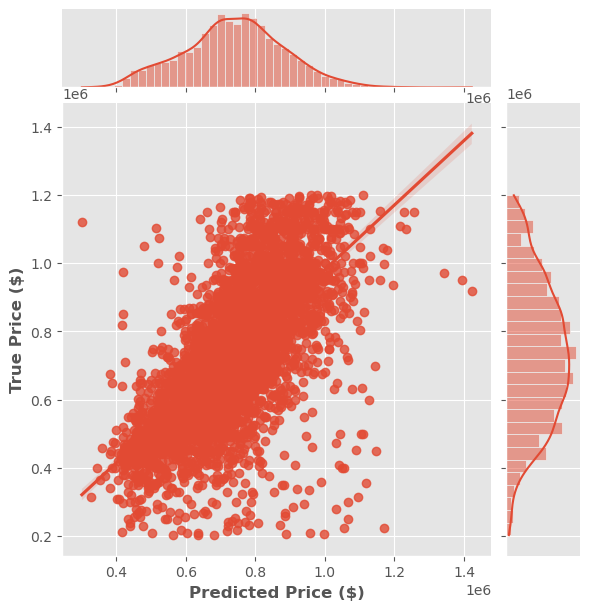

In [119]:
fig = plt.figure(figsize=(9, 11))

preds = ridge_model.predict(X_te_r) # generate predictions (on training data) using fit model

pt = sns.jointplot(x=preds,y=y_test, kind='reg')
pt.ax_joint.set_xlabel('Predicted Price ($)', fontweight='bold')
pt.ax_joint.set_ylabel('True Price ($)', fontweight='bold')
plt.savefig('test_prediction.png',bbox_inches = 'tight')

This plot showing the relationship between the two variables True price and Predicted price 
On the right edge, a histogram is plotted showing the distribution of the 'True price' variable.Similarly, on the top edge, a histogram shows the distribution of the 'Predicted price' variable

In [120]:
df_clean.zipcode.unique()

array([98055, 11231, 98178, ..., 10070, 15541, 46533])

Checking only city Seattle with 3 bedrooms and 2 Bathrooms

In [145]:
seattle= df_city[(df_city['city']=='Seattle') & (df_city["bedrooms"] == 3) & (df_city["bathrooms"] == 2)].sort_values(by=['price'])
seattle


price  bedrooms  bathrooms  sqft_living  yr_built  yr_renovated  \
13031    49000.0         3        2.0         1500      1910             0   
14797    50000.0         3        2.0         1840      1926          1986   
12928    50000.0         3        2.0         1570      1948             0   
4300     52650.0         3        2.0         2050      1956             0   
28513   125000.0         3        2.0         1700      1962             0   
...          ...       ...        ...          ...       ...           ...   
15938  3500000.0         3        2.0         3200      1938          1986   
25044  3500000.0         3        2.0         1340      1901             0   
11168  3515000.0         3        2.0         2820      1955             0   
3078   3600000.0         3        2.0         1850      1920             0   
10974  4900000.0         3        2.0         1720      1939          2005   

                                                 address zipcode     city  
13031  2713 20th Avenue South, Seattle, Washington 98...   98144  Seattle  
14797  6221 37th Avenue Northeast, Seattle, Washingto...   98115  Seattle  
12928  10051 Dibble Avenue Northwest, Seattle, Washin...   10051  Seattle  
4300   5623 South Langston Road, Seattle, Washington ...   98178  Seattle  
28513  1714 Southwest Holden Street, Seattle, Washing...   98106  Seattle  
...                                                  ...     ...      ...  
15938  4508 West Sheridan Street, Seattle, Washington...   98199  Seattle  
25044  1006 East Denny Way, Seattle, Washington 98122...   98122  Seattle  
11168  1928 Magnolia Boulevard West, Seattle, Washing...   98199  Seattle  
3078   1368 Alki Avenue Southwest, Seattle, Washingto...   98116  Seattle  
10974  2347 Perkins Lane West, Seattle, Washington 98...   98199  Seattle  

[1464 rows x 9 columns]

In [148]:
x = seattle.drop(columns = ['price','zipcode','address','city' ]).astype(float)
x = sm.add_constant(x)
y = seattle['price'].astype(float)

In [149]:
model = sm.OLS(y, x, data = seattle)
model_AH = model.fit()
model_AH.summary()


/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.47e-72
Time:                        11:08:17   Log-Likelihood:                -20777.
No. Observations:                1464   AIC:                         4.156e+04
Df Residuals:                    1460   BIC:                         4.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms      6.952e+05   1.24e+05      5.616      0.000    4.52e+05    9.38e+05
bathrooms     4.635e+05   8.25e+04      5.616      0.000    3.02e+05    6.25e+05
sqft_living    386.7997     23.696     16.323      0.000     340.317     433.282
yr_built     -1374.8097    268.645     -5.118      0.000   -1901.781    -847.838
yr_renovated    42.4791     18.799      2.260      0.024       5.602      79.356
==============================================================================
Omnibus:                      950.332   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22709.195
Skew:                           2.628   Prob(JB):                         0.00
Kurtosis:                      21.565   Cond. No.                     4.18e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.61e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Next I will predict price for the house 

In [151]:
s1 = pd.DataFrame(preds)
s1
s2 =  pd.DataFrame(y_test)
s3 = df_city[['city','sqft_living', "bedrooms", "bathrooms"]]
df_pred = s2.merge(s3, left_index = True, right_index = True).reset_index()
df_pred = pd.concat([df_pred, s1], axis=1)
cols = df.columns.tolist()

df_pred.head(30)

index      price               city  sqft_living  bedrooms  bathrooms  \
0   18234   825000.0            Seattle         1120         2        1.0   
1    1516   875000.0               Kent         2420         4        4.0   
2   19130   920000.0            Seattle         1450         4        1.0   
3   23198   513500.0          Covington         1160         3        1.5   
4   19202  1035000.0            Seattle          860         2        1.0   
5   10867   673000.0            Seattle          840         2        1.0   
6   18323   740000.0             Renton         1960         4        2.0   
7    6772   860000.0             Renton         2580         4        3.0   
8   11623   965000.0            Seattle         2520         4        2.5   
9    9527   950000.0           Enumclaw         2670         3        2.5   
10  22764   709999.0            Seattle         1380         1        1.0   
11   9260   305000.0             Auburn         1120         3        1.0   
12  14099   685000.0        Federal Way         2240         3        3.0   
13   3858   548800.0            Seattle         1250         2        2.0   
14  22523   442000.0             Burien         1050         2        1.0   
15   5309   625000.0  108 Foothill Blvd         1430         3        2.5   
16    511   830000.0             Queens         1230         3        2.0   
17   1189   352000.0             Auburn         1040         3        1.0   
18   4917   960000.0          Sammamish         1630         3        2.0   
19   1946  1050000.0            Seattle         1500         2        2.0   
20  28642   550000.0           Enumclaw         1770         3        1.5   
21  20048  1115000.0            Seattle         2200         4        3.5   
22  20119   476000.0            Seattle         1300         3        2.5   
23  11505   605000.0         Des Moines         1600         4        3.0   
24  16747   625000.0               Kent         1850         3        2.5   
25    353   577000.0         Des Moines         1610         3        2.0   
26  29053   785000.0             Duvall         1400         3        2.0   
27  10384   510000.0          Covington          860         2        1.0   
28  11159   939990.0             Renton         3008         4        3.5   
29  23920   675000.0            Seattle         1280         3        2.0   

                0  
0   719634.703414  
1   742390.464469  
2   733058.667050  
3   505364.355161  
4   691990.099009  
5   674691.299639  
6   706997.591797  
7   826155.368173  
8   914011.162021  
9   730003.187772  
10  772505.407629  
11  465852.635274  
12  660969.128584  
13  743049.859177  
14  532211.442760  
15  797226.197047  
16  810949.043726  
17  434366.584016  
18  903459.509321  
19  806425.757085  
20  584844.704428  
21  912084.678212  
22  755780.430143  
23  599849.151765  
24  630887.392696  
25  579224.857220  
26  725630.287836  
27  451317.676495  
28  891825.929643  
29  770663.311574

In [152]:
s1

0
0     719634.703414
1     742390.464469
2     733058.667050
3     505364.355161
4     691990.099009
...             ...
4159  689068.745368
4160  806454.962478
4161  776454.162980
4162  674736.949198
4163  490277.889901

[4164 rows x 1 columns]

In [153]:
s1 = pd.DataFrame(preds)
s1
s2 =  pd.DataFrame(y_test)
s3 = df_city[['city','sqft_living']]
df_pred = s2.merge(s3, left_index = True, right_index = True).reset_index()
df_pred = pd.concat([df_pred, s1], axis=1)
cols = df.columns.tolist()

df_pred.head(20)


index      price               city  sqft_living              0
0   18234   825000.0            Seattle         1120  719634.703414
1    1516   875000.0               Kent         2420  742390.464469
2   19130   920000.0            Seattle         1450  733058.667050
3   23198   513500.0          Covington         1160  505364.355161
4   19202  1035000.0            Seattle          860  691990.099009
5   10867   673000.0            Seattle          840  674691.299639
6   18323   740000.0             Renton         1960  706997.591797
7    6772   860000.0             Renton         2580  826155.368173
8   11623   965000.0            Seattle         2520  914011.162021
9    9527   950000.0           Enumclaw         2670  730003.187772
10  22764   709999.0            Seattle         1380  772505.407629
11   9260   305000.0             Auburn         1120  465852.635274
12  14099   685000.0        Federal Way         2240  660969.128584
13   3858   548800.0            Seattle         1250  743049.859177
14  22523   442000.0             Burien         1050  532211.442760
15   5309   625000.0  108 Foothill Blvd         1430  797226.197047
16    511   830000.0             Queens         1230  810949.043726
17   1189   352000.0             Auburn         1040  434366.584016
18   4917   960000.0          Sammamish         1630  903459.509321
19   1946  1050000.0            Seattle         1500  806425.757085

Now we can see predictid price and the price itself. I want to see what is the mean variance to see for what city my prediction works the best 

In [154]:
df_pred.columns

Index(['index', 'price', 'city', 'sqft_living', 0], dtype='object')

In [155]:
#checking the differens 
df_pred["mean_variance"]= (df_pred[0] - df_pred["price"])
df_pred.sort_values("mean_variance", ascending=True)

index      price           city  sqft_living             0  \
1038  22249  1120000.0      Skykomish          480  3.016952e+05   
3884    661  1102000.0         SeaTac         1320  5.148039e+05   
2626  10701  1050000.0           Kent          960  4.810699e+05   
766    2542   975000.0       Enumclaw          770  4.199345e+05   
1909   5741  1075000.0         Auburn         1420  5.236120e+05   
...     ...        ...            ...          ...           ...   
1501   3518   314039.0         SeaTac         4790  1.095752e+06   
2671  18869   207054.0        Redmond         2050  9.972142e+05   
968   18442   250733.0   Maple Valley         4130  1.067215e+06   
391   19131   224515.0  Normandy Park         3370  1.055063e+06   
1476  23264   224542.0       Kirkland         3230  1.168916e+06   

      mean_variance  
1038 -818304.836801  
3884 -587196.058250  
2626 -568930.122316  
766  -555065.514676  
1909 -551388.018294  
...             ...  
1501  781712.691359  
2671  790160.160972  
968   816481.769369  
391   830548.274714  
1476  944373.771299  

[4164 rows x 6 columns]

In [156]:
df_pred_variance=df_pred.groupby(["city"], as_index=False).mean_variance.mean()

In [162]:
df_pred_variance= df_pred_variance.sort_values("mean_variance", ascending=True)
df_pred_variance.head(60)

city  mean_variance
96        Philadelphia -392162.573897
13             Baldwin -366433.412966
26             Chicago -352300.792515
41          Evansville -318184.899918
17            Bismarck -283436.514272
55            Honolulu -278711.047289
129            Yaphank -264206.078258
117          Skykomish -262602.037989
20           Bradenton -251686.176431
81       North Babylon -244852.945002
108       Saint Albans -192208.284804
74         Minneapolis -177329.231825
121           Syracuse -176727.743296
1    1035 Bergslien St -152260.846142
94          Park Hills -151640.066334
10              Ardoch -137240.428573
35              Denver -117070.248701
73              Milton -106307.483671
114       Seaside Park  -90046.533529
30             Clinton  -89260.358387
75            Montague  -89066.885362
102          Red Cloud  -76717.625965
23              Carmel  -76649.827854
109       Saint George  -63711.883706
38              Duvall  -60337.736308
65             Lincoln  -54587.741559
76              Naples  -53775.632412
106           Rockford  -49031.438081
8              Altoona  -43232.168007
9            Anchorage  -42712.343324
77       Nebraska City  -37998.097032
127     West Homestead  -35720.991136
82          North Bend  -31619.123596
97         Plattsmouth  -29255.727285
88      North Wildwood  -26415.044605
110          Sammamish  -18550.468118
118         Snoqualmie  -18519.632816
100             Queens  -16550.956274
29           Clarkston  -15720.748326
19             Bothell  -15459.870200
126       West Babylon  -13381.642162
69        Maple Valley  -10205.426356
5       175 W 18th Ave   -9704.073070
40            Enumclaw   -9695.737599
59             Kenmore   -8840.229473
25        Cedar Rapids   -8214.711464
79           Newcastle   -7951.618000
128        Woodinville   -7078.273520
93             Pacific   -6063.942550
64            Leadwood   -4893.654188
56            Issaquah   -4491.412587
12              Auburn   -3158.689409
123            Tukwila   -2916.372057
47         Federal Way   -2797.368293
48               Flora   -1836.598533
84       North Chicago   -1750.356605
66            Longmont   -1276.120961
91             Osceola    1360.231679
104             Renton    1878.340760
21              Burien    2318.180864

We can see that prediction works the best for Longmont, Osceola and Renton cities

# Conclusion

The most expensive houses are in Hunts Point,Mercer Island,Seattle,Medina, Newcastle the price can be up to 235 million USD. The most expensive house in our data set is in Hunts Point 235 million USD the house is with 4 bedrooms 5 bathrooms 4440 Square feet 2 floors with waterfront no basement was build in 1990 and renovated in 2014.
The cheapest houses we can find  in Auburn, Skykomish, Sammamish, Woodinville, and Seattle has very different prices it  can be cheap and it also can be very expensive. The cheapest price for house we can find in Auburn for example  about 40 thousand USD house with 4 bedrooms, 2.5 bathrooms 1670 Square feet 1 floor was build in 1967 and never renovated since. 

  During the exploratory analysis I can see good correlation between square footage and price. I calculated estimated change in price for every sqft and came up with the price of 560 USD 

I checked all features to see what affect the price I could see that the most expensive houses have waterfront but there is also cheap houses with waterfront. Greenbelt affect the price a little bit less, but still we can see that price silkily elevated. Sewer System does not effect price.Nuisance does not effect the price
We can see how condition effect the price. Good,Average, and Very good condition have almost the same price range same as fair and poor condition almost on the same level. Houses with Gas/Solar heat sources are the most expensive Gas heat sources itself slightly cheaper and all the others are pretty much at the similar price range

If my client would want to buy 4 bedrooms 3 bathrooms house looks like the best option would be in Seattle, Kent or Federal Way city those are top 3 cheapest option with the price starts at 207 thousand USD. Kent city there is a lot of newer houses with good square footage.
If we would look in more expensive nice option would  Renton ,Kirkland or Bellevue with almost twice bigger square footage but the price would be more then a million USD.
Average is 3 bedrooms 2 bathrooms house. If we look wow something like that cheap option would be Federal Way the house can be as cheap as 204 Thousands USD and up with the square footage of about 1800Sqft but that would be older houses about 1770 year build. Renton city has better option the house was build in 2021 but square footage is about 1310-1290 and the price is 243 thousand USD.
In Seattle we would see mush more expensive houses more then a million USD with ever smaller square footage. 
My model was fairly accurate at making predictions with  a mean scared error of $116,866 and R2 adjusted of .46. With more tuning I can get this model to be more accurate.
Overall my model was best at predicting homes in Longmont, Osceola and Renton cities
 

## Recommendation

I would recomend to my client to buy a house with 3 bedrooms 2 bathrooms in Renton city becouse this city has better option the houses we can find a house wich is new build in 2021 it woul not be big it wold be around  1310-1290 squer feet and the price would be around 243 thousand USD. The more squere footagr the higher price woul be.

## Limitations 

I wish I woul have an information about taxes and any information about schools transportation etc. 

## Next Steps

My next step would be to to find oud information about schools in the area. 

I also woul like to see property tax for each area, how far the house from public transportation. 

I woul like to give a price prediction to the buyer based on his prefer features using the model 

Find some ways to reduce kurtosis to make the distribution more normal